In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import neurd

/usr/local/lib/python3.8/dist-packages/python_jsonschema_objects/__init__.py:113: UserWarning: Schema id not specified. Defaulting to 'self'
  warnings.warn("Schema id not specified. Defaulting to 'self'")


In [4]:
from mesh_tools import trimesh_utils as tu
from datasci_tools import ipyvolume_utils as ipvu
from neurd import neuron_visualizations as nviz
from pathlib import Path
import os

import inspect
print(inspect.getfile(tu))


/usr/local/lib/python3.8/dist-packages/mesh_tools/trimesh_utils.py


In [5]:
# segment ID corresponds to a unique synapse.csv and mesh
segment_id = 864691134917511946

# Load the appropriate volume data inferface object

VDI = volume data interface
the VDI module allows for efficient management of the mesh volume

In [6]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

In [7]:
synapse_filepath = str(Path(f'./{segment_id}_synapses.csv').absolute())
synapse_filepath

'/NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/864691134917511946_synapses.csv'

In [8]:
from datasci_tools import pandas_utils as pu
df = pu.csv_to_df(synapse_filepath)
df

# ground truth data?

,segment_id,segment_id_secondary,synapse_id,prepost,synapse_x,synapse_y,synapse_z,synapse_size
0,864691134917511946,864691131890533202,74184144,postsyn,130294,142230,26219,440
1,864691134917511946,864691131971669827,75022036,postsyn,129722,172364,24745,8428
2,864691134917511946,864691132108273063,70508178,postsyn,129296,134025,26165,26588
3,864691134917511946,864691132292869029,104897939,postsyn,145174,190248,26715,4500
4,864691134917511946,864691132404296761,67503404,postsyn,126052,183560,25913,2396
...,...,...,...,...,...,...,...,...
2310,864691134917511946,864691137019576686,92314268,postsyn,136376,184538,26155,5916
2311,864691134917511946,864691137196931393,78527771,postsyn,130688,192222,24419,15896
2312,864691134917511946,864691137196956737,105192008,postsyn,143492,188714,25058,7820
2313,864691134917511946,864691137196956737,113437532,postsyn,147378,190346,25751,708


In [9]:
vdi.set_synapse_filepath(
    synapse_filepath
)

# Data Prep: Loading mesh

In [10]:
mesh = vdi.fetch_segment_id_mesh(
    segment_id,
    plot = True
)
mesh

/usr/local/lib/python3.8/dist-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

<trimesh.Trimesh(vertices.shape=(420741, 3), faces.shape=(865980, 3), name=`864691134917511946.off`)>

In [11]:
# analyze dataset properties (BSC)
filepath = '864691134917511946.off'
print(f'mesh size {os.path.getsize(filepath)} bytes')
#41396.88 KB
#41 MB

print(f'.csv size = {os.path.getsize(synapse_filepath)} bytes')
#192.50 KB



mesh size 42298303 bytes
.csv size = 196612 bytes


In [12]:
from datasci_tools import pipeline

# initialize an instance of PipelineProducts class from pipeline module, and assigns it to products variable

products = pipeline.PipelineProducts()
products

# Step 1: Decimation

In [13]:
"""
NOTE: an already decimated mesh is used for the example
in order to speed up time, that's why the mesh_dec
object will be overwritten with original mesh object
"""

"\nNOTE: an already decimated mesh is used for the example\nin order to speed up time, that's why the mesh_dec\nobject will be overwritten with original mesh object\n"

In [14]:
decimation_parameters = dict(
    decimation_ratio =0.25,
)

In [15]:
import time

#from mesh_tools import trimesh_utils as tu   <-- where do these modules come from?
# trimesh_utils contains a variet of functions used for handling triangular meshes
# decimation involves reducing the number of polygons in the mesh (simplify mesh)

st = time.time()
mesh_decimated = tu.decimate(
    mesh,
    **decimation_parameters
)

print(f"Total time = {time.time() - st}")

xvfb-run -n 4167 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_13563.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_13563_decimated.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/decimation_meshlab_25532001.mls
Total time = 34.306947469711304


In [16]:
# saving any parameters used or output products for later use
# set parameters used for the decimation stage
products.set_stage_attrs(
    stage = "decimation",
    attr_dict = dict(
        decimation_parameters = decimation_parameters,
        segment_id = segment_id,
    ),
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
}



# Step 2: Soma Identification

The soma is the cell body of the neuron. This section of code attempts to return soma products, which are somas detected in the mesh.

soma_extraction_utils documentation: https://reimerlab.github.io/NEURD/neurd.html#module-neurd.soma_extraction_utils 
soma_identification - 

parameter_utils documentation: https://reimerlab.github.io/NEURD/neurd.html#module-neurd.parameter_utils



In [17]:
from neurd import soma_extraction_utils as sm
soma_extraction_parameters = dict()

In [18]:
# could inspect the parameters of a certain category
from neurd import parameter_utils as paru
# purpose: Want to export parameters belonging to a specific category in a module
# Exporting parameters belonging to a specific category in a module refers to making certain variables, functions, or configurations available outside the module for use in other parts of a program or by other programs.
paru.category_param_from_module(
        module = sm,
        category = "glia",
)

{'glia_volume_threshold_in_um_global': 2500,
 'glia_n_faces_threshold_global': 400000,
 'glia_n_faces_min_global': 100000}

In [19]:
# overwritting decimated mesh because original was already decimated
mesh_decimated = mesh

In [20]:
from neurd import neuron_visualizations as nviz

verbose = True

soma_products = sm.soma_indentification(
    mesh_decimated,
    verbose=verbose,
    plot=True,
    **soma_extraction_parameters
)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 5000.0 
large_mesh_threshold_inner = 3250.0 
soma_size_threshold = 562.5 
soma_size_threshold_max = 75000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
max_mesh_sized_filtered_away = 22500.0
xvfb-run -n 9940 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_6945.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_6945_remove_interior.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/remove_interior_852170.mls
removed temporary input file: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_6945.off
removed temporary output file: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_6945_remove_interior.off
/NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_

  0%|          | 0/13 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.779125]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 8887 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_638758.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_638758_poisson.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_823123.mls
removed temporary input file: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_638758.off
removed temporary output file: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_638758_poisson.off
mesh.is_watertight = True
/NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_823123.mls is being deleted....
Inside sphere validater: ratio_val = 3.404317521233

  0%|          | 0/1 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.5418655]
mesh.is_watertight = True
/NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_35380.mls is being deleted....
Inside sphere validater: ratio_val = 769.5128726957494
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(767, 3), faces.shape=(1534, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0
Going to run cgal segmentation with:
File: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/537_mesh 
clusters:3 
smoothness:0.2

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

mesh.is_watertight = True
/NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_854939.mls is being deleted....
Inside sphere validater: ratio_val = 769.5128726957494
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(767, 3), faces.shape=(1534, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>, curr_side_len_check = True, curr_volume_check = False
----- working on mesh after poisson #2: <trimesh.Trimesh(vertices.shape=(2914, 3), faces.shape=(5824, 3), name=`neuron_12345_decimated_largest_piece_poisson.off`)>
xvfb-run -n 9026 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_la

  0%|          | 0/6 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.45577199999999995]
mesh.is_watertight = True
/NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_424257.mls is being deleted....
Inside sphere validater: ratio_val = 318.4759330340049
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(524, 3), faces.shape=(1040, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0019230769230769232
Going to run cgal segmentation with:
File: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/627_mesh 
clusters:3 
smoothness:0.2

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

mesh.is_watertight = True
/NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_809482.mls is being deleted....
Inside sphere validater: ratio_val = 318.4759330340049
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(524, 3), faces.shape=(1040, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>, curr_side_len_check = True, curr_volume_check = False
----- working on mesh after poisson #3: <trimesh.Trimesh(vertices.shape=(2561, 3), faces.shape=(5122, 3), name=`neuron_12345_decimated_largest_piece_poisson.off`)>
xvfb-run -n 3399 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_la

  0%|          | 0/7 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(210, 3), faces.shape=(418, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(210, 3), faces.shape=(418, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(252, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(252, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #4: <trimesh.Trimesh(vertices.shape=(2505, 3), faces.shape=(5006, 3), name=`neuron_12345_decimated_largest_piece_poisson.off`)>
xvfb-run -n 5309 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/decimation_meshlab_25661838.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(627, 3), faces.shape=(1250, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_de

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.45000850000000003]
mesh.is_watertight = True
/NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_906094.mls is being deleted....
Inside sphere validater: ratio_val = 44.002011369429006
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(294, 3), faces.shape=(582, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0
Going to run cgal segmentation with:
File: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/225_mesh 
clusters:3 
smoothness:0.2

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

Could not find valid soma mesh in retry
----- working on mesh after poisson #5: <trimesh.Trimesh(vertices.shape=(2190, 3), faces.shape=(4376, 3), name=`neuron_12345_decimated_largest_piece_poisson.off`)>
xvfb-run -n 2883 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/decimation_meshlab_25661838.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(549, 3), faces.shape=(1094, 3), name=`neuron_12345_decimate

  0%|          | 0/5 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(230, 3), faces.shape=(454, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(230, 3), faces.shape=(454, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(108, 3), faces.shape=(207, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(108, 3), faces.shape=(207, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

----- working on mesh after poisson #6: <trimesh.Trimesh(vertices.shape=(2089, 3), faces.shape=(4174, 3), name=`neuron_12345_decimated_largest_piece_poisson.off`)>
xvfb-run -n 6173 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/decimation_meshlab_25661838.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(523, 3), faces.shape=(1042, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_de

  0%|          | 0/3 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(265, 3), faces.shape=(523, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(265, 3), faces.shape=(523, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(174, 3), faces.shape=(340, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(174, 3), faces.shape=(340, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #7: <trimesh.Trimesh(vertices.shape=(2076, 3), faces.shape=(4148, 3), name=`neuron_12345_decimated_largest_piece_poisson.off`)>
xvfb-run -n 5755 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/decimation_meshlab_25661838.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(520, 3), faces.shape=(1036, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_de

  0%|          | 0/5 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(389, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(389, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(389, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(389, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #8: <trimesh.Trimesh(vertices.shape=(1712, 3), faces.shape=(3420, 3), name=`neuron_12345_decimated_largest_piece_poisson.off`)>
xvfb-run -n 6305 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/decimation_meshlab_25661838.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(429, 3), faces.shape=(854, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_dec

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.548969]
mesh.is_watertight = True
/NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_135626.mls is being deleted....
Inside sphere validater: ratio_val = 264.5780977148202
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(309, 3), faces.shape=(612, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0032679738562091504
Going to run cgal segmentation with:
File: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/480_mesh 
clusters:3 
smoothness:0.2

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

Could not find valid soma mesh in retry



 Total time for run = 164.4888517856598
Before Filtering the number of somas found = 1

---Performing Soma Mesh Backtracking to original mesh for poisson soma 0
backtrack_soma_size_threshold = 8000
xvfb-run -n 3685 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_17554.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_17554_fill_holes.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/fill_holes_100049.mls

---- meshlab output -----
QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Current Plugins Dir is: /meshlab/src/distrib/plugins 
Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or javascript code; please delete all the spurious xml files
Error While parsing the XML filter plugin de

  0%|          | 0/19 [00:00<?, ?it/s]

Largest hole before segmentation = 195442.17366895775, after = 578941.165186773,

ratio = 2.9622120667128398, difference = 383498.9915178153
filtered_soma_list_components = [<trimesh.Trimesh(vertices.shape=(19848, 3), faces.shape=(39717, 3))>]
Not need to do a second pass because already found a soma
# of somas = 1
# of glia = 0
# of nuclei = 15


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [21]:
sm.plot_soma_products(
    mesh_decimated,
    soma_products = soma_products,
    verbose = True
)

# of somas = 1
# of glia = 0
# of nuclei = 15


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [22]:
soma_products.soma_extraction_parameters = soma_extraction_parameters
soma_products

In [23]:
products.set_stage_attrs(
    stage = "soma_identification",
    attr_dict = soma_products,
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>, <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>, <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>, <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>, <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>, <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>, <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>, <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>, <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>, <trimesh.Trimesh(vertices.shape=(2419, 3), faces.shape=(4893, 3))>, <trimesh.Trimesh(vertices.shape=(1665, 3), faces.shape=(2568, 3))>, <trimesh.Trimesh(vertices.shape=(1619, 3), faces

# Step 2b: Saving off pipeline products

In [24]:
from datasci_tools import system_utils as su
su.save_object(
    products,"products_up_to_soma_stage"
)

Saved object at /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/products_up_to_soma_stage.pkl
File size is 23.116566 MB
Cleared mesh: <trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>:140129525336144
Cleared mesh: <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>:140129518084736
Cleared mesh: <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>:140129518027392
Cleared mesh: <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>:140129518030224
Cleared mesh: <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>:140129518053600
Cleared mesh: <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>:140129517868080
Cleared mesh: <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>:140129517870912
Cleared mesh: <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>:140129518111376
Cleared mesh: <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>:14

# Step 3: Decomposition

In [25]:
import networkx as nx
nx.__version__

'2.8.8'

In [26]:
from neurd import neuron

neuron_obj = neuron.Neuron(
    mesh = mesh,
    segment_id = segment_id, # don't need this explicitely if segment_id is already in products
    pipeline_products = products,
    suppress_preprocessing_print=False,
    suppress_output=False,
)

neuron_obj

--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
Skipping the hole filling
limb_remove_mesh_interior_face_threshold = 0
use_meshafterparty = True
Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(19848, 3), faces.shape=(39717, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(19848, 3), faces.shape=(39717, 3))>]
soma_mesh_list_centers = [array([ 553544.98545949,  749839.54254837, 1047338.92563482])]
Getting Glia and Nuclei Pieces Subtracted Away 0.3145427703857422
 Splitting mesh after soma cancellation 2.645439863204956
# of split_meshes = 4
 Containing Mesh Indices 0.03418993949890137
containing_mesh_indices = {0: 0}
 non_soma_touching_meshes 8.821487426757812e-06
There were 3 pieces found after size threshold
 Finding inside pieces and non_soma_touching meshes 0.7621748447418213
soma_containing_meshes = {0: [0]}

-----Before combining multiple mesh pieces-----
soma_containing_meshes = {0: [0]}



  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/197064 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.09s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 4.806149482727051
connecting at the root
branches_touching_root = [26]
combining close nodes
combine_threshold = 700
length of Graph = 16119
After combining close endpoints max(kept_branches_idx) = 26, len(kept_branches_idx) = 26
empty_indices % = 0.0
 conflict_indices % = 0.0037420005192980313


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Decomposing first pass: 22.659196853637695
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [69449, 13220, 547, 4355, 39120, 7590, 8199, 5668, 4882, 10063, 6629, 14708, 6180]
mesh_large_connectivity: 0.7072396278381348
Finding MAP candidates connected components: 0.00018668174743652344
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.6083412170410156
Grouping MP Sublimbs by Graph: 0.12781310081481934
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.010641813278198242
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 8189 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/te

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.15722227096557617
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 81.39803147315979
Checking connected components after removing cycles
Total time for mesh KDTree = 1.581176996231079
sbv[0].reshape(-1,3) = [[ 550001.9  743270.1 1043789. ]]
closest_sk_pt_coord BEFORE = [ 549714.  742901. 1045320.]
current_skeleton.shape = (4751, 2, 3)
node_for_stitch = 4528: [ 549714.  742901. 1045320.]
node_for_stitch AFTER = 4528: [ 549714.  742901. 1045320.]
possible_node_loc = [  31  303  330  405  529  935 1168 1215 1445 1553 1569 1701 1723 1803
 2042 2260 2283 2520 2557 2636 2798 2801 2802 2874 2901 3110 3114 3137
 3167 3247 3253 3424 3447 3479 3500 3795 4197 4222 4461 4515 4528 4680
 4720 4750]
possible_node_loc AFTER = [  31  303  330  405  529  935 1168 1215 1445 1553 1569 1701 1723 1803
 2042 2260 2283 2520 2557 2636 2798 2801 2802 2874

  0%|          | 0/37 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (4583, 2, 3)
high-degree endpoints were connected so just using that connection
curr_branch = {1482.0, 1485.0, 1490.0, 1493.0, 1466}
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 1 valid paths to replace
valid_paths = [array([3993., 3992., 4004.])]
valid_path_lengths = [580.6654952088738]
length of Graph = 4578
Working on path [3993. 3992. 4004.]
path_degrees = [3, 2, 3]
skeletonize_and_clean_connected_branch_CGAL: 100.72423934936523
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8789 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_52715.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_52715_remove_interior.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/remov

0it [00:00, ?it/s]

Total time for decomposition = 33.145195960998535
mesh_correspondence_first_pass: 33.145244121551514
Limb decomposed into 10 branches
divided_skeleton_graph_recovered = (4575, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (4575, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (9, 10)
empty_indices % = 0.20279628560935942
 conflict_indices % = 0.018493258485913645


  0%|          | 0/462 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 155.60129189491272
correspondence_1_to_1: 21.721198558807373
Total time for MAP sublimb processing 155.60151600837708
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.00499272346496582
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.008883237838745117
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.001428365707397461
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0018954277038574219
Do Not Need to Fix MP Decomposition 3 so just continuing
---- Working on MP Decomposition #

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.20181564245810055
 conflict_indices % = 0.003933597341064988


  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 3]
MP_branches_for_correspondence = [0 3]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [ 563290.32537776  726396.29725494 1040712.26167108]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [7]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.25746701620181356
 conflict_indices % = 0.012054665004942199


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [ 528048.23493116  738378.68018906 1076921.83034921]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.24730528511821975
 conflict_indices % = 0.00512865090403338


  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.274927785293795
 conflict_indices % = 0.015722695528172875


  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 




---- Working on (3, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [ 544165.4049786   721897.99254932 1044831.71286521]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.1924981966818947
 conflict_indices % = 0.00018033181053137774


  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.20706793395940623
 conflict_indices % = 0.004354740987579521


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (3, 0) 




---- Working on (4, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [ 515656.61063332  738420.63084309 1027362.50549421]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.22352319388543318
 conflict_indices % = 0.002520632597471236


  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2526366251198466
 conflict_indices % = 0.011824864173857462


  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (4, 0) 




---- Working on (5, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [ 552421.37615997  736725.93864965 1031610.1967896 ]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [3]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.2440758853686772
 conflict_indices % = 0.0005433883809388806


  0%|          | 0/122 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.24976209249843662
 conflict_indices % = 0.004730960602517741


  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (5, 0) 




---- Working on (6, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [ 539700.08052065  687414.11271422 1039892.58772448]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.19410408392385045
 conflict_indices % = 0.0003380132066588602


  0%|          | 0/189 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.21684728695229005
 conflict_indices % = 0.0037621427368184626


  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (6, 0) 



Time for decomp of Limb = 337.9230844974518
Number of matching vertices = 89
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/28 [00:00<?, ?it/s]

392837 392838
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 1 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 554358.   749290.5 1039952. ]
Time for preparing soma vertices and root: 0.0004982948303222656
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/63606 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.47it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.9429397583007812
connecting at the root
branches_touching_root = [4]
combining close nodes
combine_threshold = 700
length of Graph = 4691
After combining close endpoints max(kept_branches_idx) = 4, len(kept_branches_idx) = 5
empty_indices % = 0.0
 conflict_indices % = 0.0027349400447391928


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Decomposing first pass: 7.639066219329834
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [40617, 4735, 29031]
mesh_large_connectivity: 0.04052424430847168
Finding MAP candidates connected components: 0.00010991096496582031
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.12770652770996094
Grouping MP Sublimbs by Graph: 0.02865123748779297
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.006122112274169922
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 1871 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None_poisson.off -s /NEURD_Chenlab/Applications/Tutorials/

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/4 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.07924818992614746
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 54.70243740081787
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.1334214210510254
filter_end_node_length = 4000


  0%|          | 0/54 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (2089, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 1 valid paths to replace
valid_paths = [array([1166., 1173., 1178., 1191.])]
valid_path_lengths = [582.0910813282514]
length of Graph = 2089
Working on path [1166. 1173. 1178. 1191.]
path_degrees = [3, 2, 2, 3]
node_degrees = [2 2 2 2 2 2 4]
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 61.05609607696533
Working on limb correspondence for #0 MAP piece
xvfb-run -n 1835 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_37686.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_37686_remove_interior.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/remove_inte

0it [00:00, ?it/s]

Total time for decomposition = 15.074511766433716
mesh_correspondence_first_pass: 15.074564456939697
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (2079, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (2079, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.26149792291249346
 conflict_indices % = 0.0013712810722880228


  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 81.088458776474
correspondence_1_to_1: 4.95177435874939
Total time for MAP sublimb processing 81.08866500854492
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.004023313522338867
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.006732940673828125
Fixing Possible Soma Extension Branch for Sublimb 1
Total time for mesh KDTree = 0.2570664882659912
sbv[0].reshape(-1,3) = [[ 554358.   749290.5 1039952. ]]
closest_sk_pt_coord BEFORE = [ 556602.02796298  748554.33839125 1033297.39006678]
current_skeleton.shape = (1207, 2, 3)
node_for_stitch = 1191: [ 556602.02796298  748554.33839125 1033297.39006678]
node_for_stitch AFTER = 1191: [ 556602.02796298  748554.33839125 1033297.39006678]
possible_node_loc = [346 945]
possible_node_loc AFTER = [346

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.3023489467849224
 conflict_indices % = 0.0070329822616407986


  0%|          | 0/73 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

curr_width_median = 316.7923956923936
curr_width_median = 848.3628159716854
curr_width_median = 1117.7547460303356
checked segment branches after soma add on
MP (because soma touching verts) soma extension add: 6.770129442214966
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [ 553291.08253277  753103.90798636 1009036.57433233]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.2644730402740594
 conflict_indices % = 0.0004893917148861445


  0%|          | 0/233 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2616079708425888
 conflict_indices % = 0.007224654402725959


  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [1]
conn = [1]
winning_vertex = [ 550755.20472931  753610.13232065 1019827.00076467]
MP_branches_with_stitch_point = [1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.2718134894174014
 conflict_indices % = 0.005383912474377022


  0%|          | 0/130 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.27330358720622017
 conflict_indices % = 0.010823467043647287


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [1]
MP_branches_for_correspondence = [1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 



Time for decomp of Limb = 139.63563108444214
Number of matching vertices = 49
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/9 [00:00<?, ?it/s]

126510 126511
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 2 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 560775.   752816.8 1055182. ]
Time for preparing soma vertices and root: 0.0002853870391845703
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/44944 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.06it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.888662576675415
branches_touching_root = [2]
combining close nodes
combine_threshold = 700
length of Graph = 4031
After combining close endpoints max(kept_branches_idx) = 14, len(kept_branches_idx) = 14
empty_indices % = 0.0
 conflict_indices % = 0.005704989637421167


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Decomposing first pass: 5.6830153465271
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [1704, 3061, 35321]
mesh_large_connectivity: 0.017627716064453125
Finding MAP candidates connected components: 0.00010991096496582031
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.1199026107788086
Grouping MP Sublimbs by Graph: 0.0318446159362793
Divinding into MP and MAP pieces: 2.384185791015625e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0026209354400634766
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 6534 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None_poisson.off -s /NEURD_Chenlab/Applications/Tutorials/A

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.04954695701599121
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 31.621426343917847
Checking connected components after removing cycles
Total time for mesh KDTree = 0.2771925926208496
sbv[0].reshape(-1,3) = [[ 560775.   752816.8 1055182. ]]
closest_sk_pt_coord BEFORE = [ 561257.  752418. 1055610.]
current_skeleton.shape = (1246, 2, 3)
node_for_stitch = 0: [ 561257.  752418. 1055610.]
node_for_stitch AFTER = 0: [ 561257.  752418. 1055610.]
possible_node_loc = [   0   53   66  162  224  236  243  255  304  323  345  374  459  477
  495  547  558  616  711  818  864  893  912 1007 1024 1068 1133 1196
 1217 1246]
possible_node_loc AFTER = [   0   53   66  162  224  236  243  255  304  323  345  374  459  477
  495  547  558  616  711  818  864  893  912 1007 1024 1068 1133 1196
 1217 1246]
curr_shortest_path = [0]
Current stitch po

  0%|          | 0/27 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1095, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 34.94776153564453
Working on limb correspondence for #0 MAP piece
xvfb-run -n 626 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_54004.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_54004_remove_interior.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/remove_interior_41025.mls
removed temporary input file: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_54004.off
removed temporary output file: /NEURD_Chenlab/Applic

0it [00:00, ?it/s]

Total time for decomposition = 6.1056177616119385
mesh_correspondence_first_pass: 6.105666875839233
Limb decomposed into 5 branches
divided_skeleton_graph_recovered = (1095, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1095, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.22681235344010378
 conflict_indices % = 0.012148879908197376


  0%|          | 0/132 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 44.895785093307495
correspondence_1_to_1: 3.8397462368011475
Total time for MAP sublimb processing 44.89595437049866
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.008086919784545898
Do Not Need to Fix MP Decomposition 0 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 5]
conn = [0, 5]
winning_vertex = [ 562145.73810209  747810.29072226 1071042.77744516]
MP_branches_with_stitch_point = [0, 5]
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.3566030534351145
 conflict_indices % = 0.01431297709923664


  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 5]
MP_branches_for_correspondence = [0 5]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 57.2700834274292
Number of matching vertices = 24
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/16 [00:00<?, ?it/s]

89781 89782
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 3 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 552945.2  757231.5 1044509. ]
Time for preparing soma vertices and root: 0.00038504600524902344
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/40475 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.16it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.3225669860839844
branches_touching_root = [11]
combining close nodes
combine_threshold = 700
length of Graph = 8442
After combining close endpoints max(kept_branches_idx) = 42, len(kept_branches_idx) = 43
empty_indices % = 0.0
 conflict_indices % = 0.014541138066622153


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

Decomposing first pass: 7.7813684940338135
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 0.00010514259338378906
Total time for MAP sublimb processing 5.7220458984375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 4.2438507080078125e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.04546928405761719
sbv[0].reshape(-1,3) = [[ 552945.2  757231.5 1044509. ]]
closest_sk_pt_coord BEFORE = [ 552509.3623345   757743.64268187 1044615.10832465]
current_skeleton.shape = (209, 2, 3)
node_for_stitch = 1: [ 552509.3623345   757743.64268187 1044615.10832465]
node_for_stitch AFTER = 1: [ 552509.3623345   757743.64268187 1044615.10832465]
possible_node_loc = [  0 209]
possible_node_loc AFTER = [  0 209]
curr_shortest_path = [1, 0.0]
Current stitch point was not a branch or endp

  0%|          | 0/43 [00:00<?, ?it/s]

80873 80874
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 4 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 555922.5  753837.  1042346. ]
Time for preparing soma vertices and root: 0.0003597736358642578
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/18270 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.87it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.29114866256713867
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 1200
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 1.3411943912506104
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [36429]
mesh_large_connectivity: 0.00013899803161621094
Finding MAP candidates connected components: 7.557868957519531e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.027134180068969727
Grouping MP Sublimbs by Graph: 3.719329833984375e-05
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0025801658630371094
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 4347 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None_poisson.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_P

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.0405731201171875
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 22.89266300201416
Checking connected components after removing cycles
Total time for mesh KDTree = 0.2526702880859375
sbv[0].reshape(-1,3) = [[ 555922.5  753837.  1042346. ]]
closest_sk_pt_coord BEFORE = [ 555996.  754118. 1042130.]
current_skeleton.shape = (955, 2, 3)
node_for_stitch = 0: [ 555996.  754118. 1042130.]
node_for_stitch AFTER = 0: [ 555996.  754118. 1042130.]
possible_node_loc = [  0 101 206 284 313 424 453 518 576 633 642 655 693 712 717 718 901 955]
possible_node_loc AFTER = [  0 101 206 284 313 424 453 518 576 633 642 655 693 712 717 718 901 955]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [ 555996.  754118. 1042130.]
skipping soma 0 becaus

  0%|          | 0/16 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (865, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 25.6117262840271
Working on limb correspondence for #0 MAP piece
xvfb-run -n 5920 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_33835.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_33835_remove_interior.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/remove_interior_162883.mls
removed temporary input file: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_33835.off
removed temporary output file: /NEURD_Chenlab/Applic

0it [00:00, ?it/s]

Total time for decomposition = 6.842178583145142
mesh_correspondence_first_pass: 6.84222674369812
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (865, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (865, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.21738175629306322
 conflict_indices % = 0.0


  0%|          | 0/113 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 34.99371290206909
correspondence_1_to_1: 2.5372276306152344
Total time for MAP sublimb processing 34.993921995162964
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 36.68995213508606
Number of matching vertices = 14
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

36428 36429
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 5 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 552683.8  752073.2 1055323. ]
Time for preparing soma vertices and root: 0.00036334991455078125
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7305 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.70it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.1526200771331787
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 621
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.8532538414001465
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [14570]
mesh_large_connectivity: 0.00026297569274902344
Finding MAP candidates connected components: 0.00010895729064941406
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.016009092330932617
Grouping MP Sublimbs by Graph: 5.698204040527344e-05
Divinding into MP and MAP pieces: 1.430511474609375e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0025436878204345703
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 2662 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None_poisson.off -s /NEURD_Chenlab/Applications/Tutorials/Aut

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/3 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.03922867774963379
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 14.860438108444214
Checking connected components after removing cycles
Total time for mesh KDTree = 0.9507186412811279
sbv[0].reshape(-1,3) = [[ 552683.8  752073.2 1055323. ]]
closest_sk_pt_coord BEFORE = [ 552647.  751526. 1055300.]
current_skeleton.shape = (501, 2, 3)
node_for_stitch = 501: [ 552647.  751526. 1055300.]
node_for_stitch AFTER = 501: [ 552647.  751526. 1055300.]
possible_node_loc = [  0  43  60  67  76  90 101 102 176 190 194 205 428 449 501]
possible_node_loc AFTER = [  0  43  60  67  76  90 101 102 176 190 194 205 428 449 501]
curr_shortest_path = [501]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [ 552647.  751526. 1055300.]
skipping soma 0 because closest skelet

  0%|          | 0/13 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (437, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 16.673768520355225
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8054 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_2317.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_2317_remove_interior.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/remove_interior_971668.mls
removed temporary input file: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_2317.off
removed temporary output file: /NEURD_Chenlab/Applica

0it [00:00, ?it/s]

Total time for decomposition = 2.8647265434265137
mesh_correspondence_first_pass: 2.8648555278778076
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (437, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (437, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.24207275223061084
 conflict_indices % = 0.0017158544955387784


  0%|          | 0/39 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 20.686941623687744
correspondence_1_to_1: 1.1457185745239258
Total time for MAP sublimb processing 20.687061548233032
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 21.723809480667114
Number of matching vertices = 29
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

14569 14570
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Successful Limb Decomposition
Total time for Skeletonization and Mesh Correspondence = 646.3826293945312


 ----- Working on Stitching ----------
Starting the floating pieces preprocessing
Floating 0: <trimesh.Trimesh(vertices.shape=(165, 3), faces.shape=(326, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.67572021484375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/164 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.68it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.030534982681274414
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 67
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [139.18824246]
width_median= 139.18824246485542
segment_widths_median = [139.18824246]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/164 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.21it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.09095883369445801
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 83
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [139.2551025]
width_median= 139.25510249922007
segment_widths_median = [139.2551025]
Using the axon parameters
Decomposing first pass: 0.05767464637756348
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.170967102050781e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.3365020751953125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.18402814865112305
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

325 326
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.3486061096191406
Floating 1: <trimesh.Trimesh(vertices.shape=(75, 3), faces.shape=(146, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.245208740234375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 81.34it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.028435468673706055
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 15
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [206.11050883]
width_median= 206.1105088323848
segment_widths_median = [206.11050883]
Decomposing first pass: 0.04174304008483887
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.4318695068359375e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.8358230590820312e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07152867317199707


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.13883233070373535


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.2693940563489
 conflict_indices % = 0.0014473176379776148


  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 23


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.6259067357512953
 conflict_indices % = 0.0


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 9
Total time for stitching floating pieces = 7.350873947143555
Total time for Concept Networks = 7.8315513134002686
Total time for all mesh and skeletonization decomp = 661.5655369758606
No soma volume ratios so computing them now
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 1871 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_393556.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_393556_poisson.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_323749.mls
removed temporary input file: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_393556.off
removed temporary output file: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_393556_poisson.off
mesh.

  0%|          | 0/122 [00:00<?, ?it/s]

  0%|          | 0/122 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 140



  0%|          | 0/140 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 134



  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 114



  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 354



  0%|          | 0/354 [00:00<?, ?it/s]

  0%|          | 0/354 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 76



  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 41



  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 32



  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 198



  0%|          | 0/198 [00:00<?, ?it/s]

  0%|          | 0/198 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 57



  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 34



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 295



  0%|          | 0/295 [00:00<?, ?it/s]

  0%|          | 0/295 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 58



  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 33



  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 78



  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 22



  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 181



  0%|          | 0/181 [00:00<?, ?it/s]

  0%|          | 0/181 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 36



  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 14



  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 144



  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 265



  0%|          | 0/265 [00:00<?, ?it/s]

  0%|          | 0/265 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 82



  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 102



  0%|          | 0/102 [00:00<?, ?it/s]

  0%|          | 0/102 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 79



  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 178



  0%|          | 0/178 [00:00<?, ?it/s]

  0%|          | 0/178 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 267



  0%|          | 0/267 [00:00<?, ?it/s]

  0%|          | 0/267 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 46



  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 228



  0%|          | 0/228 [00:00<?, ?it/s]

  0%|          | 0/228 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 34



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 22



  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 190



  0%|          | 0/190 [00:00<?, ?it/s]

  0%|          | 0/190 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 133



  0%|          | 0/133 [00:00<?, ?it/s]

  0%|          | 0/133 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 15



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 91



  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 96



  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 272



  0%|          | 0/272 [00:00<?, ?it/s]

  0%|          | 0/272 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 13



  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 27



  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 25



  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 59



  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 46



  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 15



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 13



  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 29



  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 14



  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 36



  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 257



  0%|          | 0/257 [00:00<?, ?it/s]

  0%|          | 0/257 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 90



  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length
width_name BEFORE processing = no_spine_median_mesh_center
After processing
width_name = no_spine_median_mesh_center, distance_by_mesh_center= True, no_spines = True, summary_measure= median
Working on limb L0 branch 22
    No spines and using precomputed width: 1160.5630208228558
Working on limb L0 branch 20
    No spines and using precomputed width: 1320.1551104534096
Working on limb L0 branch 21
    No spines and using precomputed width: 420.64660686472865
Working on limb L0 branch 6
    current_width= 364.8750147246453
Working on limb L0 branch 14
    current_width= 463.6404728472427
Working on limb L0 branch 16
    current_width= 659.4023906354239
Working on limb L0 branch 12
    current_width= 301.9746217472391
Working on limb L0 branch 23
    current_width= 343.37714157809916
Working on limb L0 branch 0
    current_width= 307.4576049098127
Working on limb L0 branch 3
    current_width= 322.0403369620389
Working on limb L0 branch 11
    

In [27]:
nviz.visualize_neuron(
    neuron_obj,
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Calculate statistics

In [28]:
decomp_products = neuron_obj.calculate_decomposition_products(
    store_in_obj = True,
)

decomp_products

In [29]:
print(neuron_obj.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>, <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>, <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>, <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>, <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>, <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>, <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>, <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>, <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>, <trimesh.Trimesh(vertices.shape=(2419, 3), faces.shape=(4893, 3))>, <trimesh.Trimesh(vertices.shape=(1665, 3), faces.shape=(2568, 3))>, <trimesh.Trimesh(vertices.shape=(1619, 3), faces

# Saving off neuron

In [30]:
vdi.save_neuron_obj(
    neuron_obj,
    verbose = True
)

Total time for soma meshes compression = 0.2125990390777588
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 0.6193971633911133
Total time for limb_meshes compression = 1.39866304397583
    Starting Limb Correspondence Compression


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for new_limb_correspondence compression = 11.27956509590149
Cleared mesh: <trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>:140129525336144
Cleared mesh: <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>:140129518084736
Cleared mesh: <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>:140129518027392
Cleared mesh: <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>:140129518030224
Cleared mesh: <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>:140129518053600
Cleared mesh: <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>:140129517868080
Cleared mesh: <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>:140129517870912
Cleared mesh: <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>:140129518111376
Cleared mesh: <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>:140129518054896
Cleared mesh: <trimesh.Trimesh(vertices.shape=(2419, 3), face

'864691134917511946.pbz2'

# Reloading the Neuron

In [31]:
neuron_obj_rec = vdi.load_neuron_obj(
    segment_id = segment_id,
    #mesh_decimated = mesh_decimated
)

Decompressing Neuron in minimal output mode...please wait


# Exporting Branch meshes

limb_name = L0

 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

No limb name was given so using L0 because was the limb in the first key


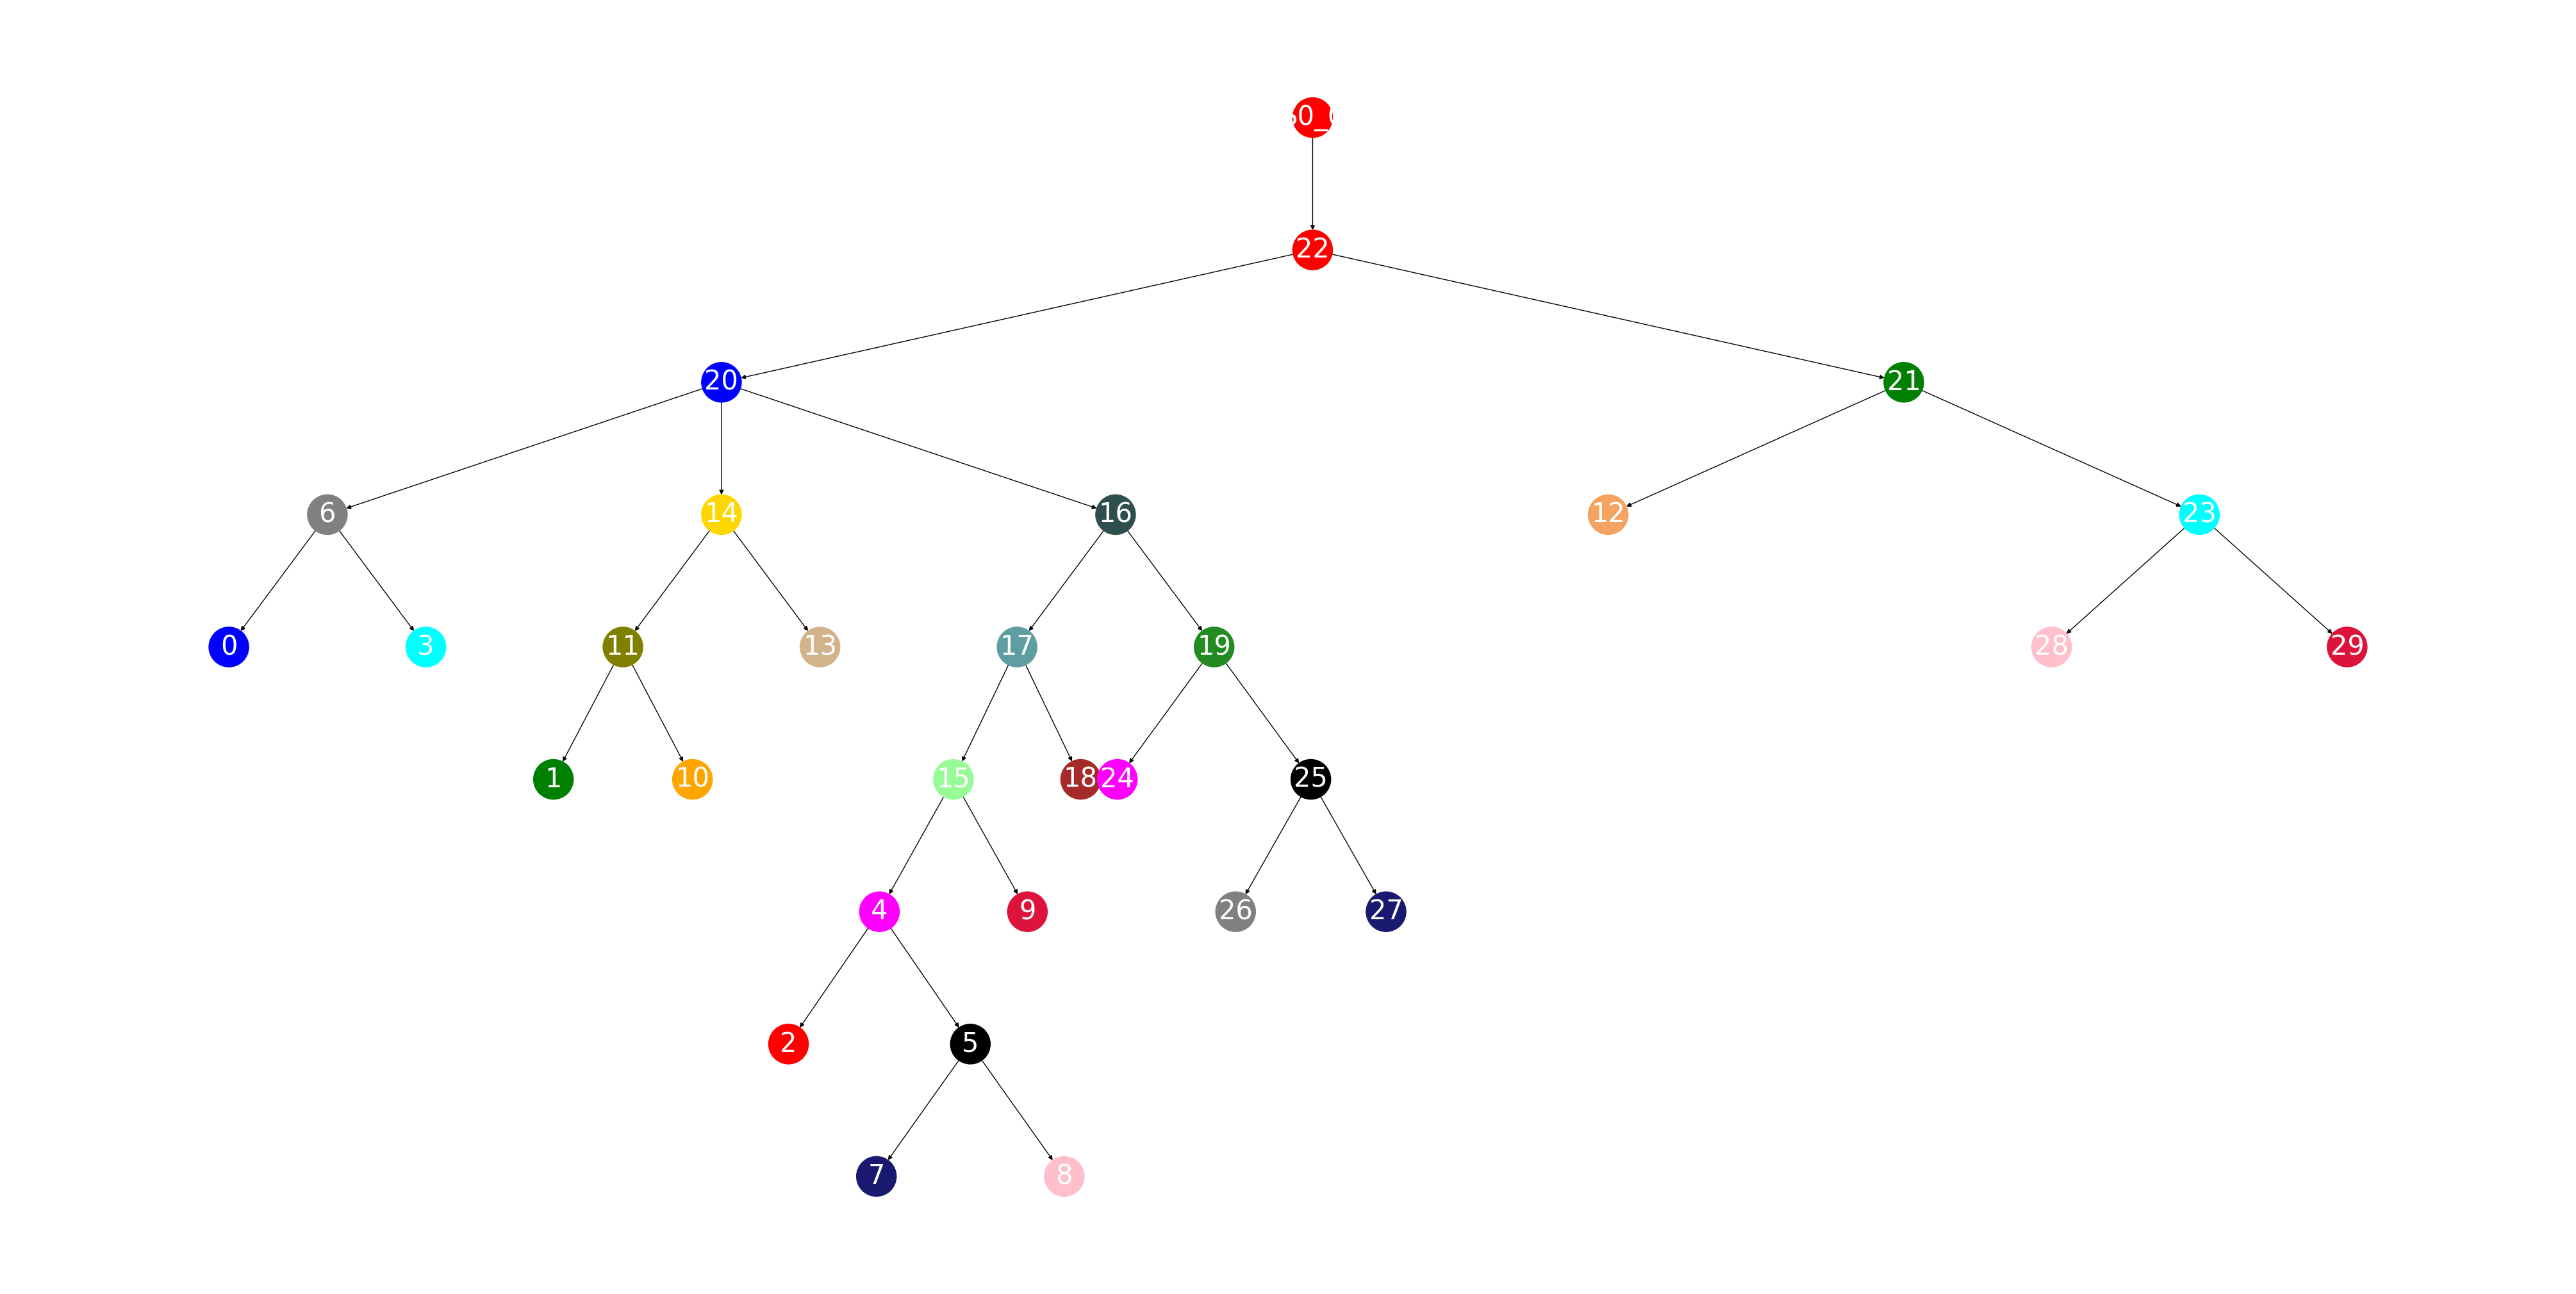

In [32]:
nviz.plot_limb(neuron_obj_rec,0)

In [33]:
branch_idx = 3
limb_idx = 0

branch_mesh = neuron_obj_rec[limb_idx][branch_idx].mesh
ipvu.plot_objects(branch_mesh)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [34]:
_ = branch_mesh.export(f"{segment_id}_limb_{limb_idx}_branch_{branch_idx}.off")

# Step 4A: Multi Soma Split Suggestions

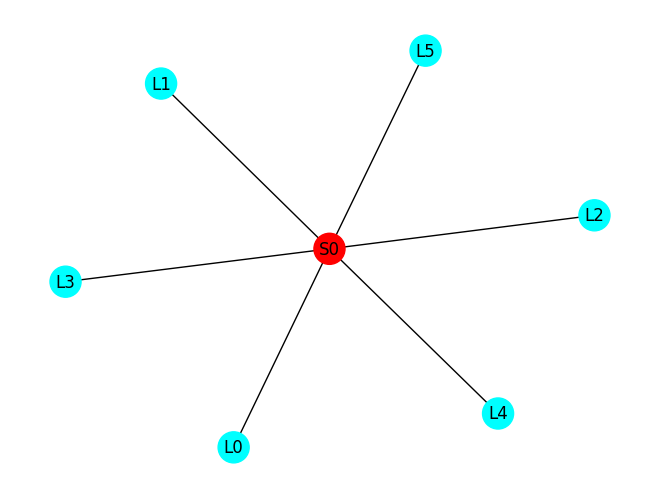

In [35]:
from neurd import neuron_visualizations as nviz
nviz.plot_soma_limb_concept_network(
    neuron_obj_rec
)

In [36]:
multi_soma_split_parameters = dict()

In [37]:
_ = neuron_obj_rec.calculate_multi_soma_split_suggestions(
    plot = True,
    store_in_obj = True,
    **multi_soma_split_parameters
)


In [38]:
neuron_obj_rec.pipeline_products.multi_soma_split_suggestions.multi_soma_split_parameters = multi_soma_split_parameters

# Step 4B: Multi Soma Split Execution

In [39]:
neuron_list = neuron_obj_rec.multi_soma_split_execution(
    verbose = False,
)

No error limbs to processs so just returning the original neuron


In [40]:
n1 = neuron_list[0]
print(n1.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>, <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>, <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>, <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>, <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>, <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>, <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>, <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>, <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>, <trimesh.Trimesh(vertices.shape=(2419, 3), faces.shape=(4893, 3))>, <trimesh.Trimesh(vertices.shape=(1665, 3), faces.shape=(2568, 3))>, <trimesh.Trimesh(vertices.shape=(1619, 3), faces

# Step 5: Cell Typing

In [41]:
from neurd import neuron_pipeline_utils as npu

In [42]:
neuron_obj_axon = npu.cell_type_ax_dendr_stage(
    n1,
    mesh_decimated = mesh_decimated,
    plot_axon = False,
)


Number of segments: 3


Number of segments: 2


Number of segments: 5


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 4


Number of segments: 4


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segme

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.43s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 2.8683671951293945
branches_touching_root = [16]
combining close nodes
combine_threshold = 1300
length of Graph = 13106
After combining close endpoints max(kept_branches_idx) = 230, len(kept_branches_idx) = 190
empty_indices % = 0.0
 conflict_indices % = 0.05154251788018087
Decomposing first pass: 23.679742574691772
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 1.049041748046875e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.8596649169921875e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.010387182235717773
sbv[0].reshape(-1,3) = [[ 552945.2  757231.5 1044509. ]]
closest_sk_pt_coord BEFORE = [ 552495.72569604  757785.38871569 1044811.89960749]

In [43]:
nviz.plot_axon(
    neuron_obj_axon
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Autoproofreading Stage

About to do syn_density stats
syn_density_post = 0.8420535973349018
syn_density_head = 0.4096239895368741
syn_density_neck = 0.021051339933372548
syn_density_shaft = 0.3241029210575482
sk_length_synapse_density = 2280139.8937986805
About to do spine_density stats
postsyn_limb_branch = {'L0': array([ 0,  1,  3,  4,  6,  9, 10, 11, 12, 13, 14, 15, 18, 19, 23, 24, 25,
       27]), 'L1': array([0, 1, 4, 7]), 'L2': array([ 6,  7, 14]), 'L4': array([0]), 'L5': array([0])}
sk_length = 2186500.1267236606
# of spines = 998
Density = 0.4564372019934173
spine_density = 0.4564372019934173 (multiplier = 1000)
sk_length spine density = 2186500.1267236606
Done stats
Not apply_hand_made_low_rules
For model: LogisticRegression(class_weight={'excitatory': 1, 'inhibitory': 1.5}) 
with features: ['syn_density_shaft', 'spine_density']
pred_class = excitatory, pred_class_label = excitatory
Total time for e/i calculations = 0.15435290336608887
baylor_e_i = excitatory

*****Using v7 Filters!!!


Current node 

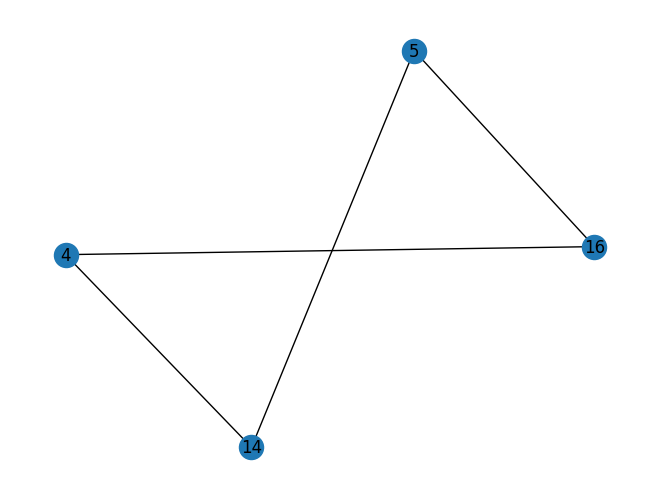

Performing global features query
Done with edge_df: 0.0010485649108886719
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  14     23.88   51.656351               0.339784              0.000335   
1   5  16     23.63   17.530484               0.115312              0.000335   
2  14   4     52.16    5.818974               0.054798              0.000000   
3  16   4     22.12   63.367861               0.596743              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                1                       None                          None  
1                1                       None                          None  
2                0                       None                          None  
3                0                       None                          None  
Afer Globa

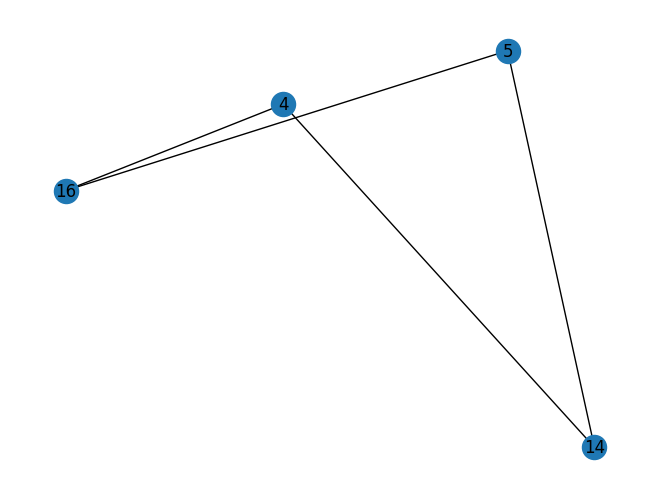

Performing node features query
Done with edge_df: 0.0010581016540527344
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  14     23.88   51.656351               0.339784              0.000335   
1   5  16     23.63   17.530484               0.115312              0.000335   
2  14   4     52.16    5.818974               0.054798              0.000000   
3  16   4     22.12   63.367861               0.596743              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                1                       None                          None   
1                1                       None                          None   
2                0                       None                          None   
3                0                       None                          None   

  above_

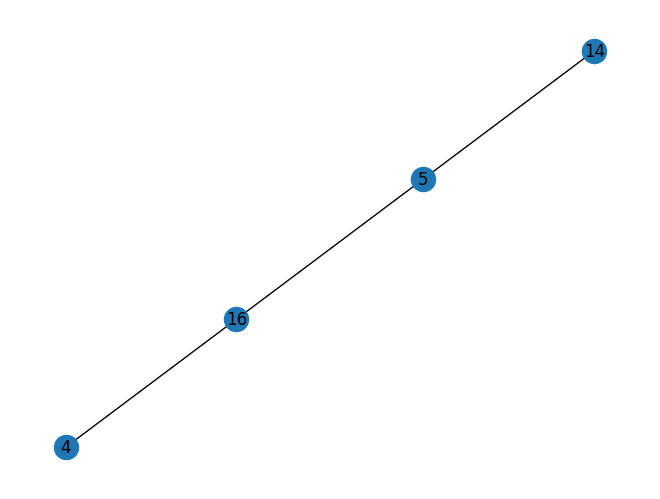

for upstream node 4, winning_node = None, error_branches = [ 5 14 16]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1800.1120816142804 but max skip distance was 2300.0
Current node skip distance was 1513.8828772852676 but max skip distance was 1513.8828772852676
Current node skip distance was 2165.103512703653 but max skip distance was 2165.103512703653
Current node skip distance was 1561.641463052997 but max skip distance was 1561.641463052997
Current node skip distance was 1555.4698732187237 but max skip distance was 1555.4698732187237
Current node skip distance was 1734.4975735030982 but max skip distance was 1900.6696439355223
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0018596649169921875
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing ed

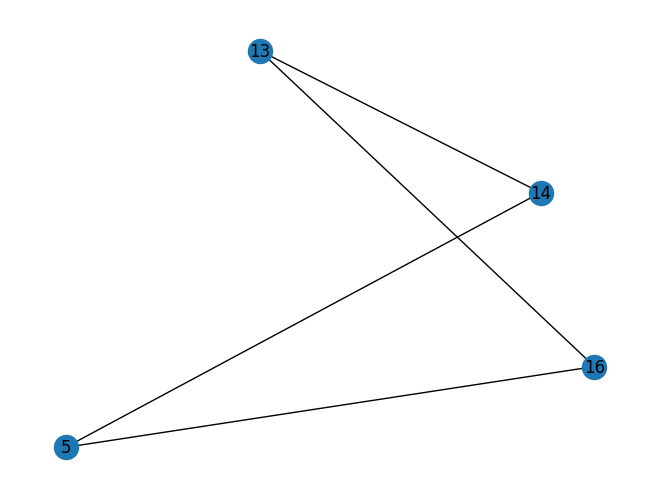

Performing global features query
Done with edge_df: 0.0018832683563232422
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  14     23.88   51.656351               0.339784              0.000335   
1   5  16     23.63   17.530484               0.115312              0.000335   
2  14  13     64.30   13.752896               0.120509              0.000000   
3  16  13     33.57   55.433938               0.485737              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                1                       None                          None  
1                1                       None                          None  
2                0                       None                          None  
3                0                       None                          None  
Afer Globa

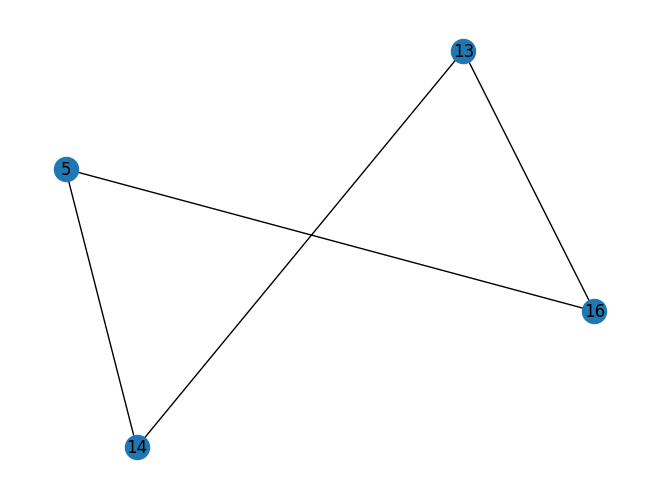

Performing node features query
Done with edge_df: 0.001590728759765625
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  14     23.88   51.656351               0.339784              0.000335   
1   5  16     23.63   17.530484               0.115312              0.000335   
2  14  13     64.30   13.752896               0.120509              0.000000   
3  16  13     33.57   55.433938               0.485737              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                1                       None                          None   
1                1                       None                          None   
2                0                       None                          None   
3                0                       None                          None   

  above_t

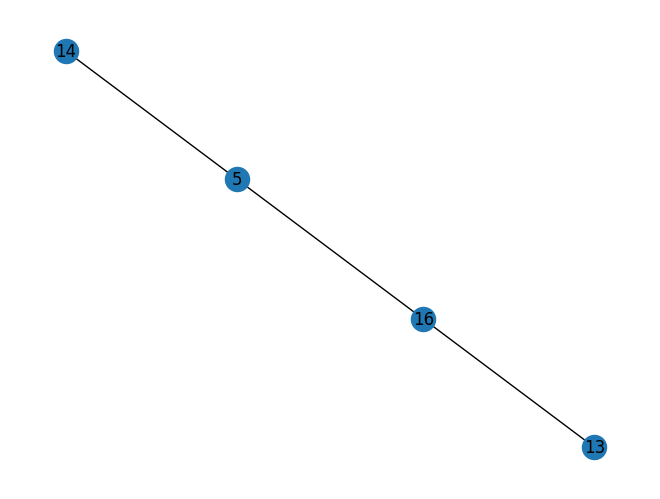

for upstream node 13, winning_node = None, error_branches = [ 5 14 16]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1584.8772872600919 but max skip distance was 1584.8772872600919
Current node skip distance was 1873.1557631602866 but max skip distance was 1873.1557631602866
Current node skip distance was 1704.755501804439 but max skip distance was 2165.103512703653
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0030858516693115234
Performing Edge Query
After edge filter, # of rows = 7
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   0   2     83.24   80.583125               1.102563              0.000201   
1   0   4     63.12   41.036382               0.561473              0.000

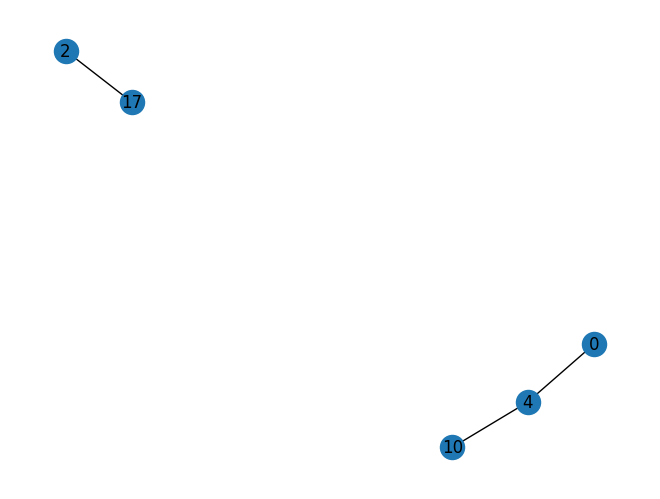

Performing global features query
Done with edge_df: 0.0010683536529541016
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  0   4     63.12   41.036382               0.561473              0.000000   
1  2  17      2.31   24.528869               0.189938              0.000201   
2  4  10     17.70   74.355623               0.651537              0.000000   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                0                        True                          None  
1                1                       False                          None  
2                0                       False                          None  
Afer Global query: 
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  2  17      2.31   24.528869               0.189938              0.

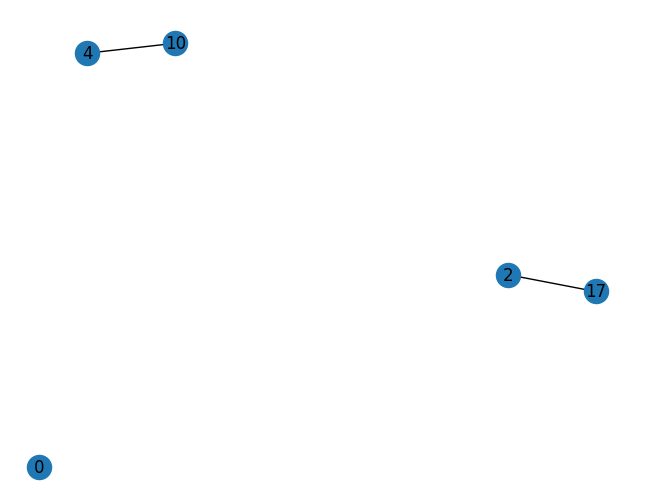

Performing node features query
Done with edge_df: 0.002355337142944336
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  2  17      2.31   24.528869               0.189938              0.000201   
1  4  10     17.70   74.355623               0.651537              0.000000   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                1                       False                          None   
1                0                       False                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  2  17      2.31   24.528869               0.189938              0.000201   
1  4  10     17.70   74.355623               0.651537              0.0

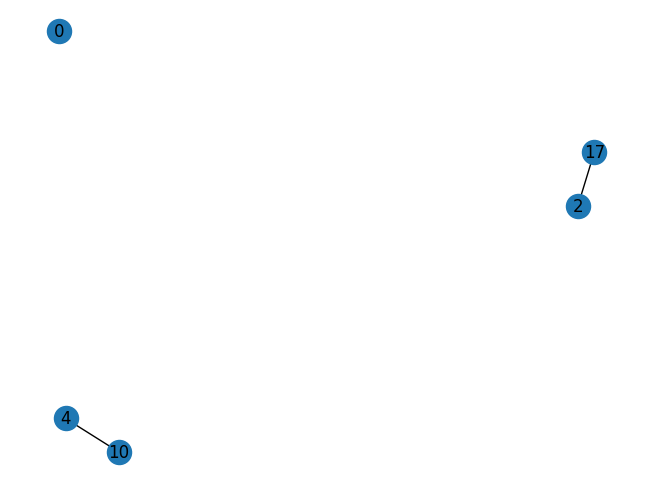

for upstream node 17, winning_node = 2, error_branches = [ 0  4 10]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1413.122703807576 but max skip distance was 1413.122703807576
Current node skip distance was 1780.438368687568 but max skip distance was 1780.438368687568
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0016138553619384766
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   55.640195               0.430847              0.000000   
1  17  21     70.64    0.727934               0.005637              0.000189   
2  17  19     56.33   18.163888               0.123308              0.000000   

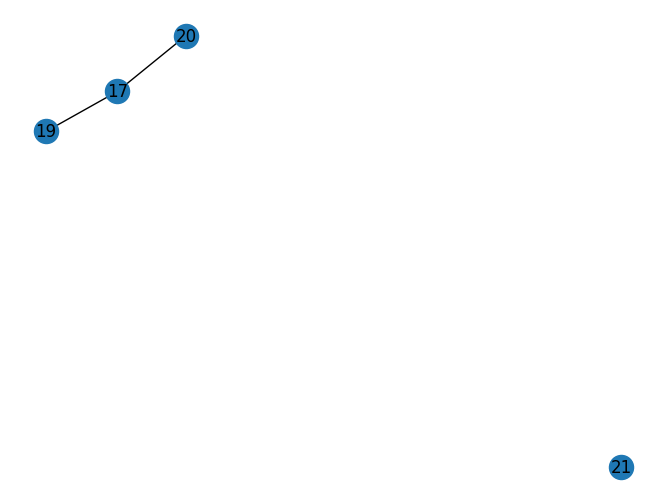

Performing global features query
Done with edge_df: 0.0021162033081054688
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   55.640195               0.430847                   0.0   
1  17  19     56.33   18.163888               0.123308                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_partner_width_delete  
0                0                       False                           True  
1                0                        True                          False  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   55.640195               0.430847                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_partner_width_delete  
0                0                       False             

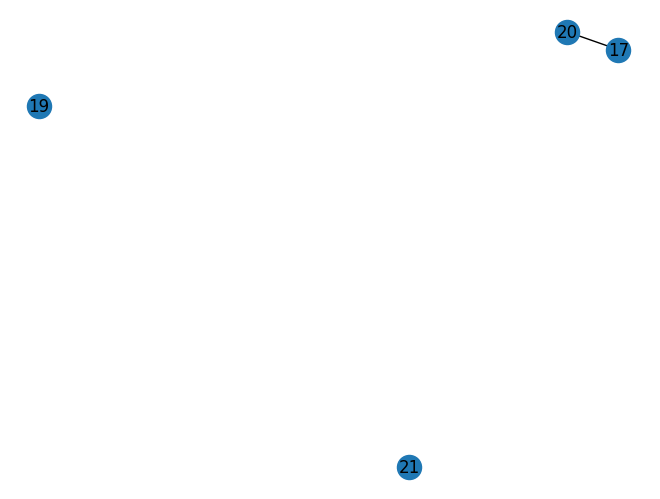

Performing node features query
Done with edge_df: 0.0027849674224853516
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   55.640195               0.430847                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_partner_width_delete  \
0                0                       False                           True   

  above_threshold_delete  
0                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   55.640195               0.430847                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_partner_width_delete  \
0                0                       False                           True   

  above_threshold_delete  
0                   None  


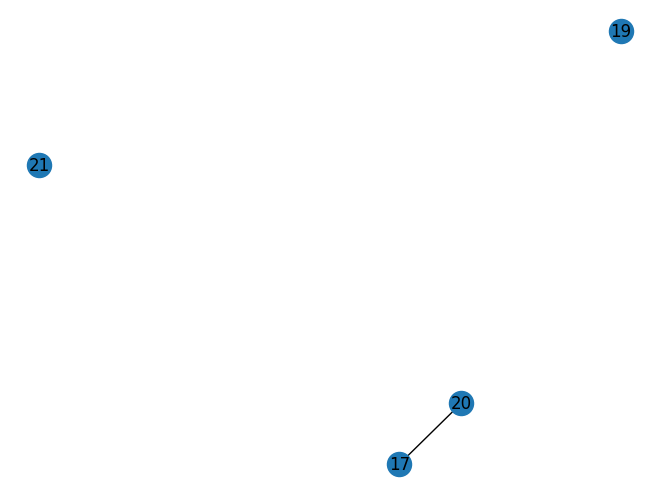

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1472.9213556462194 but max skip distance was 1472.9213556462194
Current node skip distance was 1707.788560665129 but max skip distance was 1736.7518695501676
Current node skip distance was 1628.36603139084 but max skip distance was 1628.36603139084
Current node skip distance was 1480.048301990361 but max skip distance was 1480.048301990361
Current node skip distance was 1505.8889992953318 but max skip distance was 1505.8889992953318
Current node skip distance was 1731.0013420719456 but max skip distance was 1780.438368687568
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.002142667770385742
Performing Edge Query
After edge filter, # of rows = 9
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u   v  sk_angle  widt

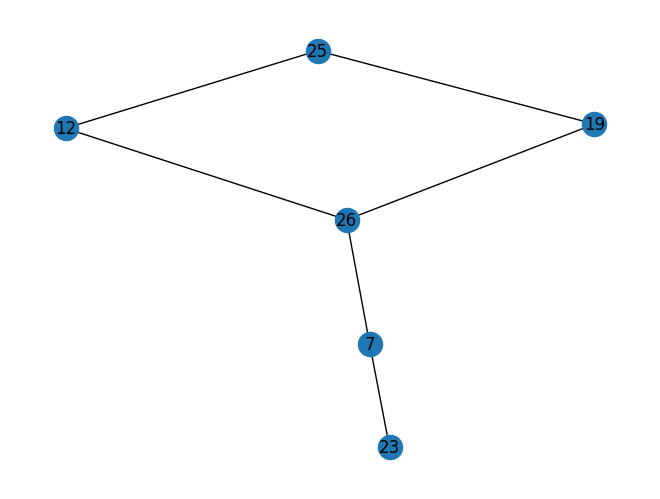

Performing global features query
Done with edge_df: 0.002666473388671875
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   7  23     13.03    8.120298               0.097445              0.000084   
1   7  26     45.19   13.405755               0.160872              0.000197   
2  12  26     29.39   23.386634               0.250626              0.000281   
3  12  25     43.29   42.127553               0.311041              0.000278   
4  19  26     59.91   77.379073               0.525298              0.000281   
5  19  25     32.65   11.864886               0.087602              0.000278   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                1                      False                          None  
1                1                       True                          None  
2      

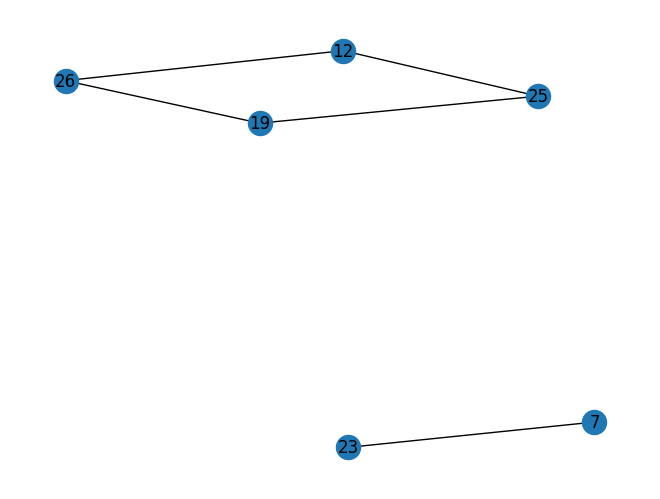

Performing node features query
Done with edge_df: 0.0013082027435302734
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   7  23     13.03    8.120298               0.097445              0.000084   
1  12  26     29.39   23.386634               0.250626              0.000281   
2  12  25     43.29   42.127553               0.311041              0.000278   
3  19  26     59.91   77.379073               0.525298              0.000281   
4  19  25     32.65   11.864886               0.087602              0.000278   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                1                      False                          None   
1                2                       None                          None   
2                1                       None                          None   
3       

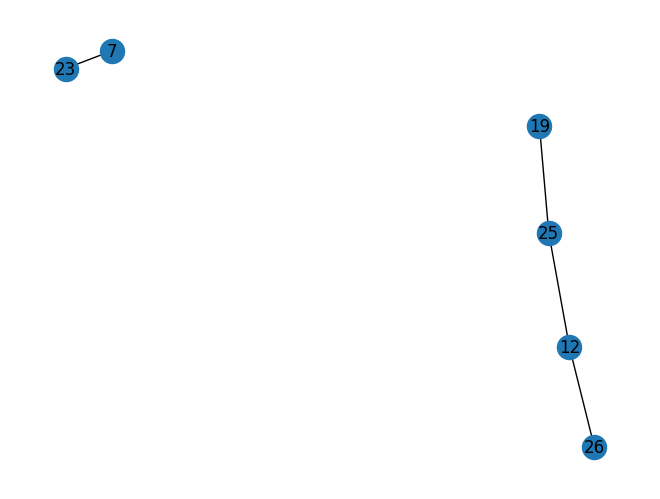

for upstream node 25, winning_node = None, error_branches = [ 7 12 19 23 26]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1458.0255655002047 but max skip distance was 1458.0255655002047
Current node skip distance was 1473.9583068018837 but max skip distance was 1473.9583068018837
Current node skip distance was 1439.2097328140164 but max skip distance was 1439.2097328140164
Current node skip distance was 1665.7633897842265 but max skip distance was 1731.0013420719456
Current node skip distance was 1483.8872757410506 but max skip distance was 1483.8872757410506
Current node skip distance was 1373.696244750608 but max skip distance was 1373.696244750608
Current node skip distance was 2051.8343766422095 but max skip distance was 2051.8343766422095
Current node skip distance was 1442.529933265894 but max skip distance was 1442.529933265894
Current node skip distance was 1775.5514533006894 but max skip distance was 23

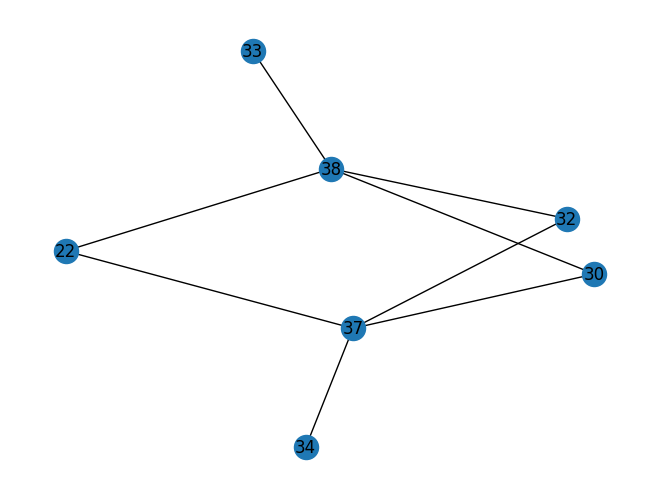

Performing global features query
Done with edge_df: 0.0012645721435546875
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  22  38     33.53   51.967919               0.468991              0.000000   
1  22  37     57.51   39.897518               0.264739              0.000197   
2  30  38     26.36   60.943285               0.508780              0.000000   
3  30  37     21.22   30.922152               0.205183              0.000197   
4  32  38     37.65   17.293017               0.227142              0.000000   
5  32  37     34.81   74.572420               0.494823              0.000197   
6  33  38     44.63    9.152830               0.184209              0.000000   
7  34  37     55.45   61.734885               0.409640              0.000014   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0 

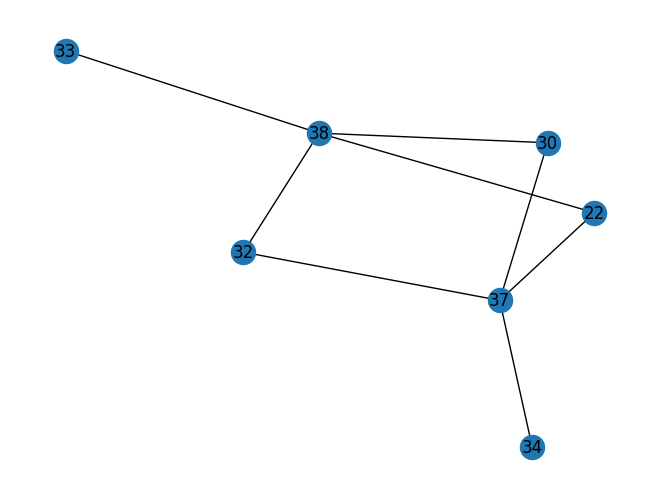

Performing node features query
Done with edge_df: 0.0016312599182128906
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  22  38     33.53   51.967919               0.468991              0.000000   
1  22  37     57.51   39.897518               0.264739              0.000197   
2  30  38     26.36   60.943285               0.508780              0.000000   
3  30  37     21.22   30.922152               0.205183              0.000197   
4  32  38     37.65   17.293017               0.227142              0.000000   
5  32  37     34.81   74.572420               0.494823              0.000197   
6  33  38     44.63    9.152830               0.184209              0.000000   
7  34  37     55.45   61.734885               0.409640              0.000014   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0    

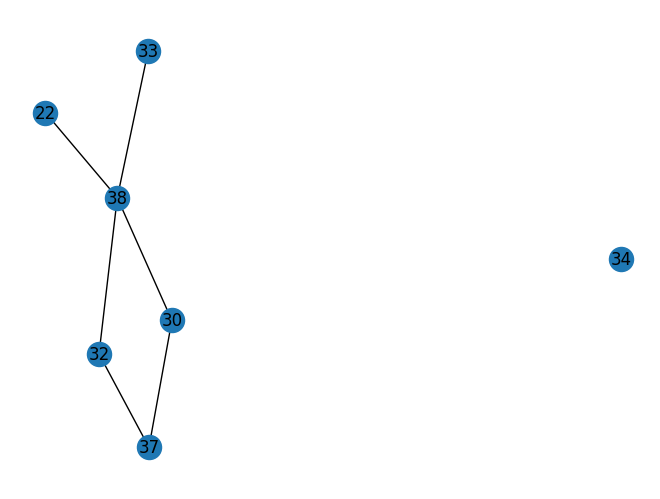

for upstream node 37, winning_node = None, error_branches = [22 30 32 33 34 38]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1411.8330370166711 but max skip distance was 1411.8330370166711
Current node skip distance was 1420.3496711923483 but max skip distance was 1420.3496711923483
Current node skip distance was 1567.6425816995368 but max skip distance was 1567.6425816995368
Current node skip distance was 1622.958573724568 but max skip distance was 2300.0
Current node skip distance was 1763.4735386570042 but max skip distance was 1763.4735386570042
Current node skip distance was 1806.1698114568526 but max skip distance was 2194.6320494015
Current node skip distance was 1522.4348593997124 but max skip distance was 1522.4348593997124
Current node skip distance was 1413.411712631187 but max skip distance was 1413.411712631187
Current node skip distance was 1541.6786377439032 but max skip distance was 1763.47353865

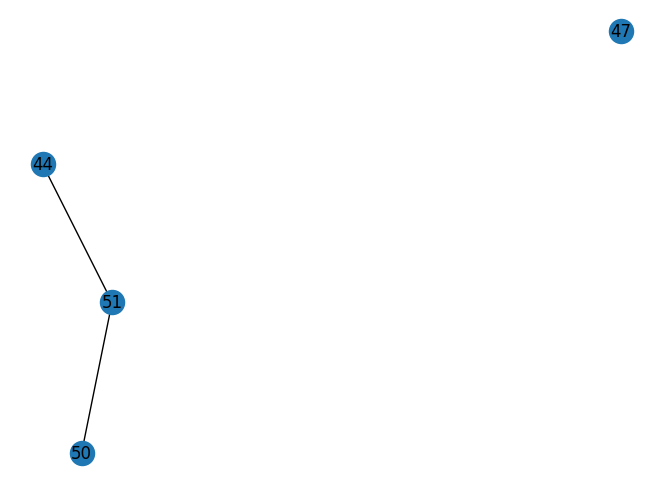

Performing global features query
Done with edge_df: 0.0009071826934814453
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  44  51     43.30  141.860633               0.497592              0.000244   
1  50  51     38.68  112.871744               0.395910              0.000012   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                5                       None                          None  
1                2                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  44  51     43.30  141.860633               0.497592              0.000244   
1  50  51     38.68  112.871744               0.395910              0.000012   

   n_synapses_diff definite_partner_sk_delete definite_partner_wi

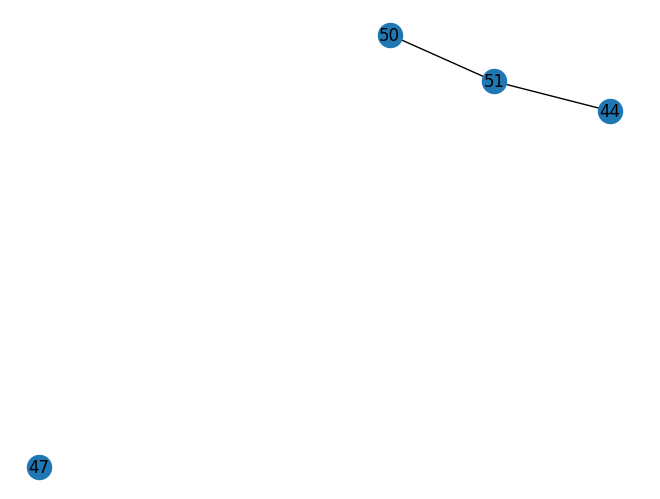

Performing node features query
Done with edge_df: 0.0011186599731445312
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  44  51     43.30  141.860633               0.497592              0.000244   
1  50  51     38.68  112.871744               0.395910              0.000012   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                5                       None                          None   
1                2                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  44  51     43.30  141.860633               0.497592              0.000244   
1  50  51     38.68  112.871744               0.395910             

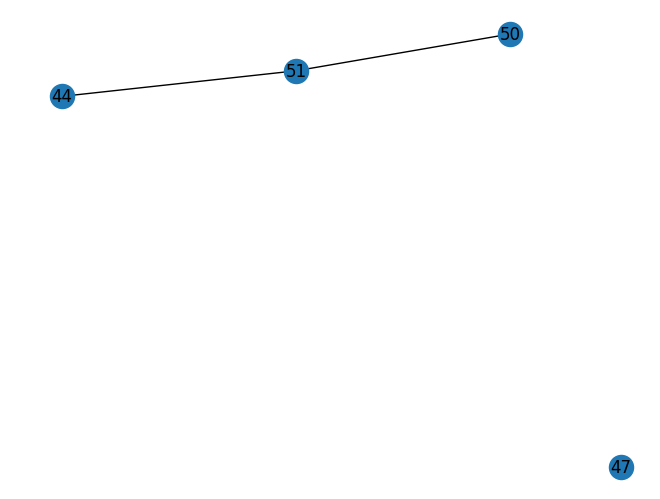

for upstream node 51, winning_node = None, error_branches = [44 47 50]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1386.728649079621 but max skip distance was 1386.728649079621
Current node skip distance was 1821.2471953793097 but max skip distance was 2300.0
Current node skip distance was 2042.6323368810115 but max skip distance was 2042.6323368810115
Current node skip distance was 1574.9637046013022 but max skip distance was 2042.6323368810115
Current node skip distance was 1990.0078664131192 but max skip distance was 1990.0078664131192
Current node skip distance was 2228.5753465060325 but max skip distance was 2300.0
Current node skip distance was 2062.904576822642 but max skip distance was 2228.5753465060325
Current node skip distance was 1606.498192758714 but max skip distance was 1606.498192758714
Current node skip distance was 1752.2050797869297 but max skip distance was 2062.904576822642
branch_match_qu

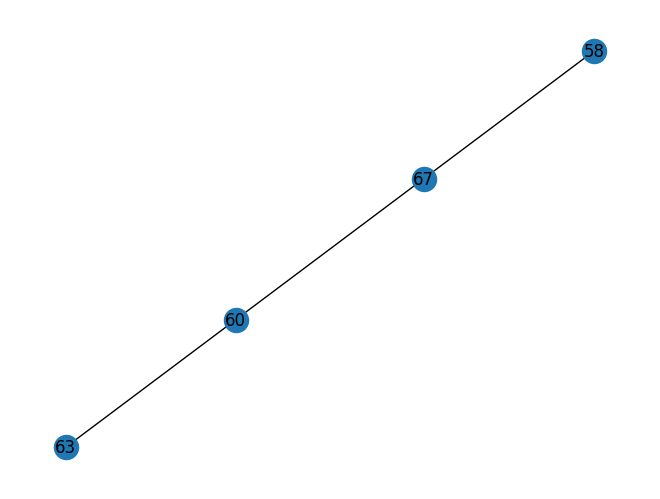

Performing global features query
Done with edge_df: 0.003411531448364258
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  58  67     16.34   42.537930               0.302698              0.000000   
1  60  63     43.14   16.616201               0.084089              0.000132   
2  60  67     28.74   57.072669               0.406127              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                2                       None                         False  
2                0                       None                          True  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  58  67     16.34   42.537930               0.302698              0

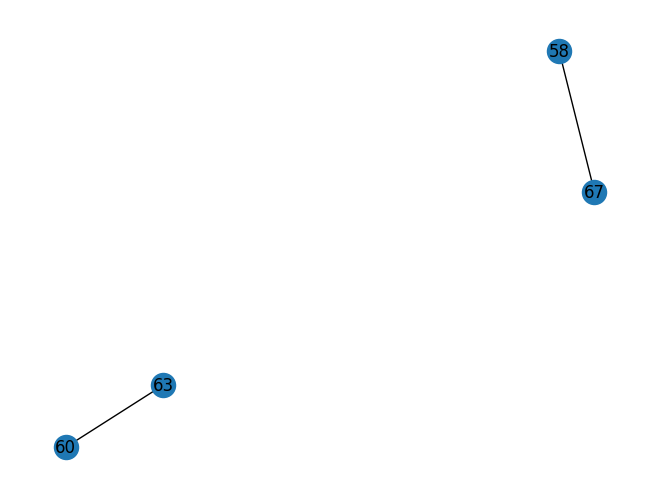

Performing node features query
Done with edge_df: 0.0026450157165527344
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  58  67     16.34   42.537930               0.302698              0.000000   
1  60  63     43.14   16.616201               0.084089              0.000132   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                2                       None                         False   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  58  67     16.34   42.537930               0.302698              0.000000   
1  60  63     43.14   16.616201               0.084089             

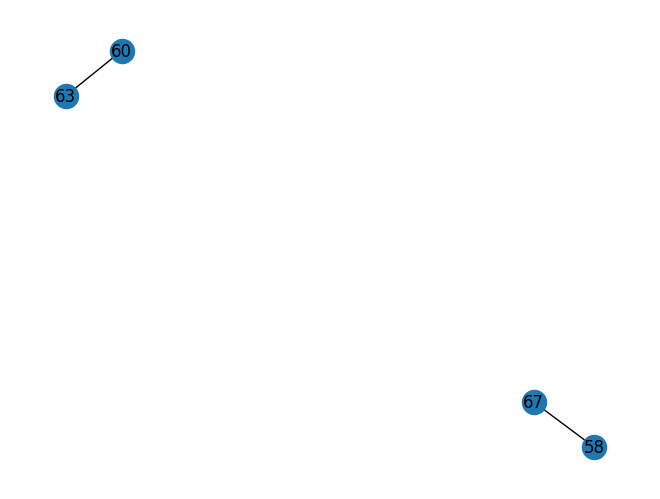

for upstream node 67, winning_node = 58, error_branches = [60 63]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (97.99128910431266) less than width_min(250)
Current node skip distance was 1953.9356343413888 but max skip distance was 1953.9356343413888
Current node skip distance was 1662.2622878608922 but max skip distance was 1953.9356343413888
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1449.5265152054012 but max skip distance was 1449.5265152054012
Current node skip distance was 1527.1977673222736 but max skip distance was 1527.1977673222736
Current node skip distance was 1777.2547339923053 but max skip distance was 1777.2547339923053
Current node skip distance was 1489.4570772222428 but max skip distance was 1734.2285957391791
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df:

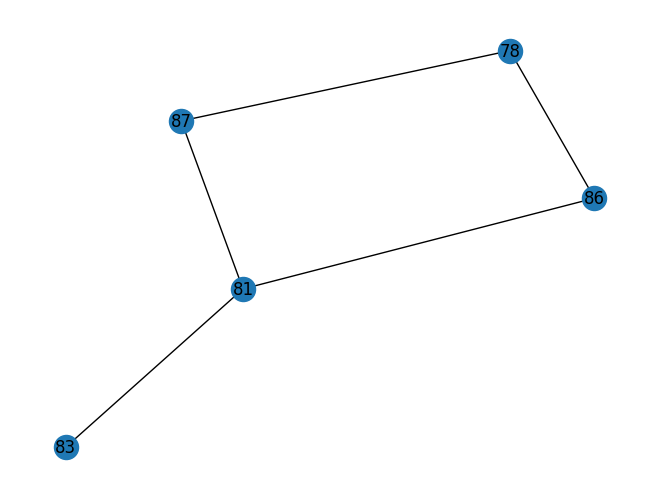

Performing global features query
Done with edge_df: 0.0024988651275634766
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  81  83     16.49   52.404492               0.625275                   0.0   
1  81  86     23.95    3.354177               0.040021                   0.0   
2  81  87     49.84   14.337994               0.171077                   0.0   
3  86  78     51.57    9.694850               0.125144                   0.0   
4  87  78     33.58    7.997321               0.103232                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                0                       None                          None  
2                0                       None                          None  
3       

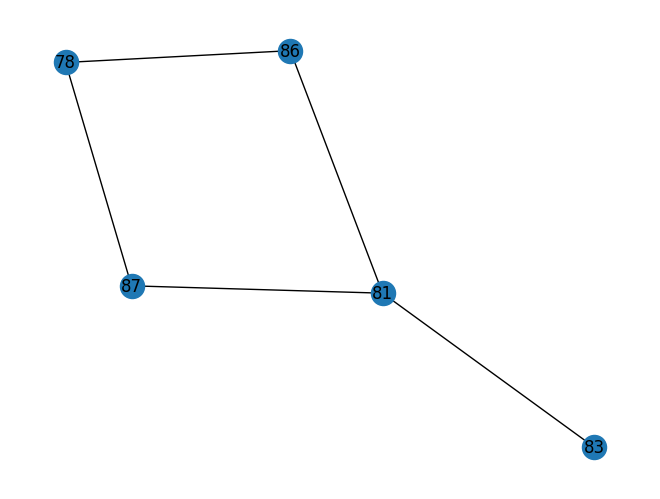

Performing node features query
Done with edge_df: 0.0011949539184570312
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  81  83     16.49   52.404492               0.625275                   0.0   
1  81  86     23.95    3.354177               0.040021                   0.0   
2  81  87     49.84   14.337994               0.171077                   0.0   
3  86  78     51.57    9.694850               0.125144                   0.0   
4  87  78     33.58    7.997321               0.103232                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                0                       None                          None   
2                0                       None                          None   
3       

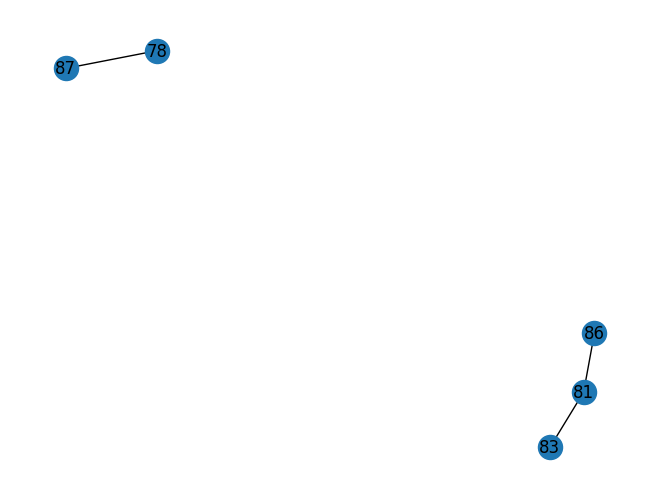

for upstream node 78, winning_node = 87, error_branches = [81 83 86]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1802.3235510933946 but max skip distance was 1821.2471953793097
Current node skip distance was 1536.0456374197795 but max skip distance was 1536.0456374197795
Current node skip distance was 1515.8765468973068 but max skip distance was 1515.8765468973068
Current node skip distance was 2103.737567869585 but max skip distance was 2103.737567869585
Current node skip distance was 1734.2285957391791 but max skip distance was 1734.2285957391791
Current node skip distance was 1342.1244873435444 but max skip distance was 2103.737567869585
Current node skip distance was 1529.8522860692512 but max skip distance was 1529.8522860692512
Current node skip distance was 1456.1349055998858 but max skip distance was 1718.3331861663005
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 

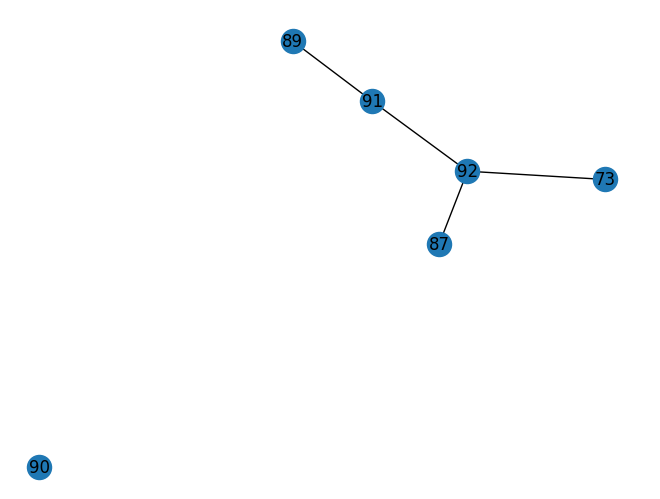

Performing global features query
Done with edge_df: 0.0011539459228515625
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  73  92     10.84    5.354765               0.078878              0.000174   
1  89  91     64.64   42.282972               0.319358              0.000000   
2  91  92     49.21   16.875864               0.187266              0.000000   
3  92  87     12.25    3.768751               0.054248              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                2                       None                          None  
1                0                       None                          None  
2                0                       None                          None  
3                0                       None                          None  
Afer Globa

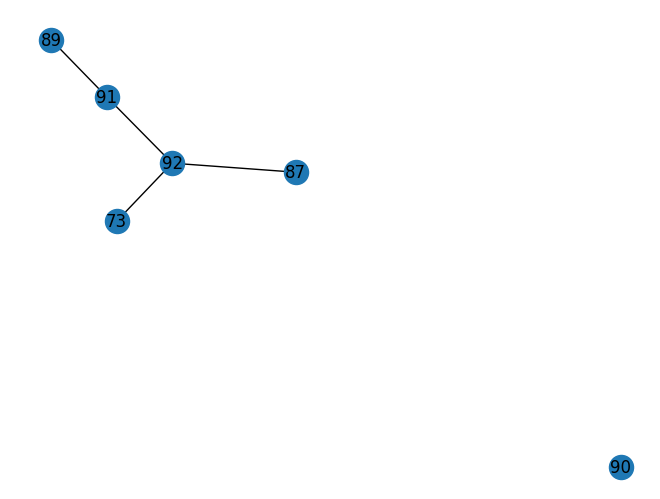

Performing node features query
Done with edge_df: 0.0012483596801757812
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  73  92     10.84    5.354765               0.078878              0.000174   
1  89  91     64.64   42.282972               0.319358              0.000000   
2  91  92     49.21   16.875864               0.187266              0.000000   
3  92  87     12.25    3.768751               0.054248              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                2                       None                          None   
1                0                       None                          None   
2                0                       None                          None   
3                0                       None                          None   

  above_

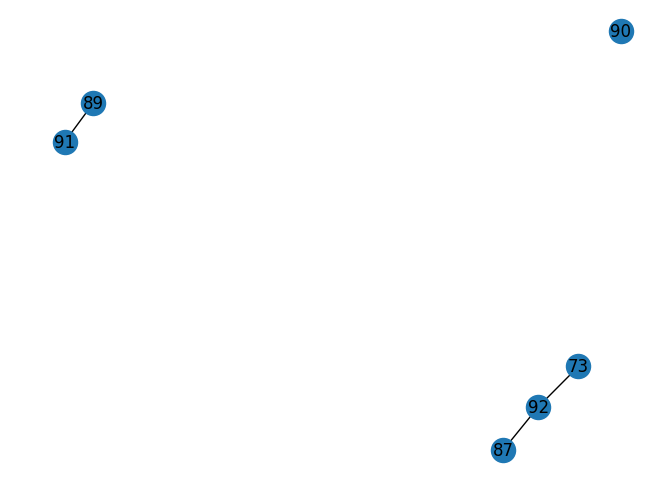

for upstream node 87, winning_node = None, error_branches = [73 89 90 91 92]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1557.2005510200245 but max skip distance was 1777.2547339923053
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0016357898712158203
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  77    112.54   27.598187               0.232029              0.000000   
1  69  82     40.65   71.657208               0.602450              0.000248   
2  69  88     77.03   25.214817               0.269021              0.000112   
3  77  82    101.75   44.059021               0.300660              0.000248   
4  77  88     5

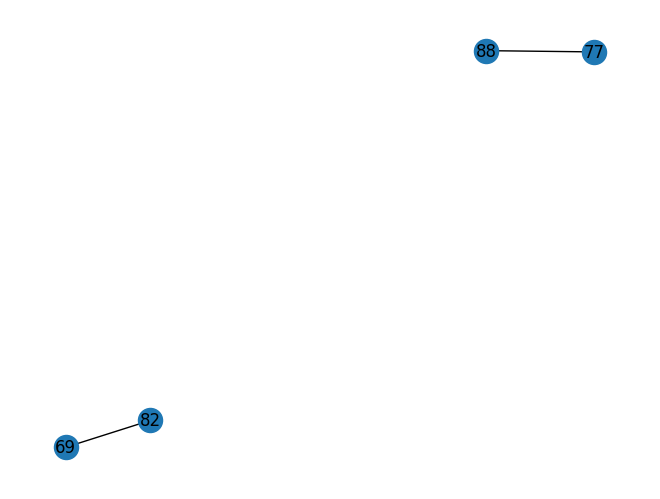

Performing global features query
Done with edge_df: 0.0009400844573974609
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  82     40.65   71.657208                0.60245              0.000248   
1  77  88     58.28   52.813004                0.56347              0.000112   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                1                      False                          None  
1                7                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  82     40.65   71.657208                0.60245              0.000248   
1  77  88     58.28   52.813004                0.56347              0.000112   

   n_synapses_diff definite_partner_sk_delete definite_partner_wi

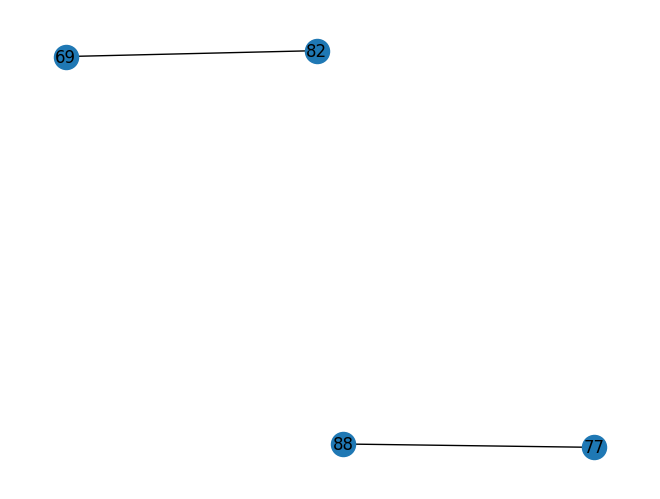

Performing node features query
Done with edge_df: 0.0009548664093017578
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  82     40.65   71.657208                0.60245              0.000248   
1  77  88     58.28   52.813004                0.56347              0.000112   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                1                      False                          None   
1                7                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  82     40.65   71.657208                0.60245              0.000248   
1  77  88     58.28   52.813004                0.56347             

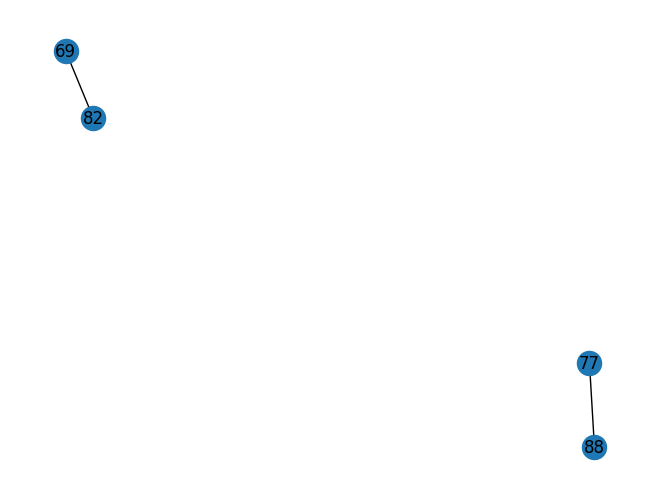

for upstream node 88, winning_node = 77, error_branches = [69 82]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (146.54113615815348) less than width_min(250)
Current node skip distance was 1718.3331861663005 but max skip distance was 1718.3331861663005
Current node skip distance was 1607.3997275888296 but max skip distance was 1607.3997275888296
Current node skip distance was 1542.1541365281187 but max skip distance was 1542.1541365281187
Current node skip distance was 1471.8380360714896 but max skip distance was 1471.8380360714896
Current node skip distance was 1529.1076968233356 but max skip distance was 1718.76524077757
Current node skip distance was 2261.5873759680135 but max skip distance was 2261.5873759680135
Current node skip distance was 1505.828917486155 but max skip distance was 2261.5873759680135
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff 

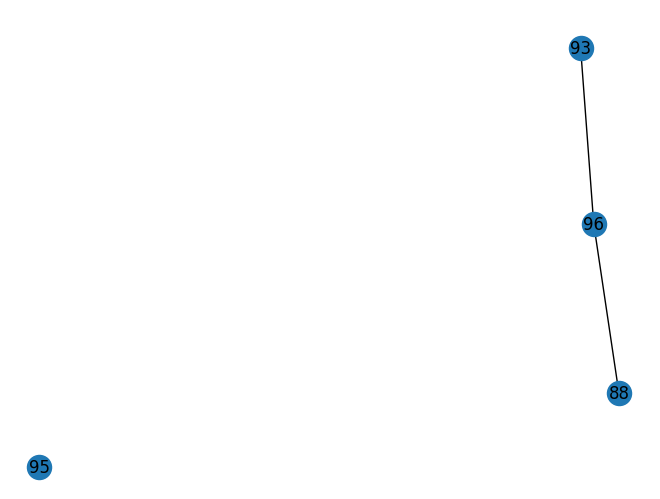

Performing global features query
Done with edge_df: 0.0010211467742919922
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  96     14.33   12.329192               0.151466              0.000091   
1  93  96     50.91    5.586907               0.068636              0.000020   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                6                       False                          None  
1                1                        True                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  96     14.33   12.329192               0.151466              0.000091   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                6                       False                 

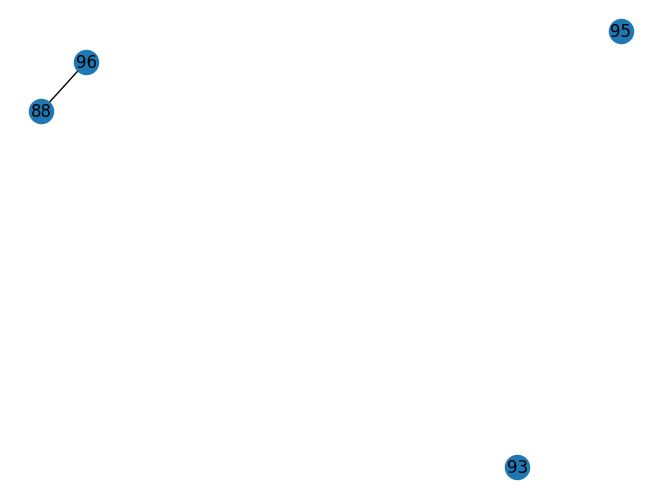

Performing node features query
Done with edge_df: 0.0010237693786621094
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  96     14.33   12.329192               0.151466              0.000091   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                6                       False                          None   

  above_threshold_delete  
0                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  96     14.33   12.329192               0.151466              0.000091   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                6                       False                          None   

  above_threshold_delete  
0                   None  


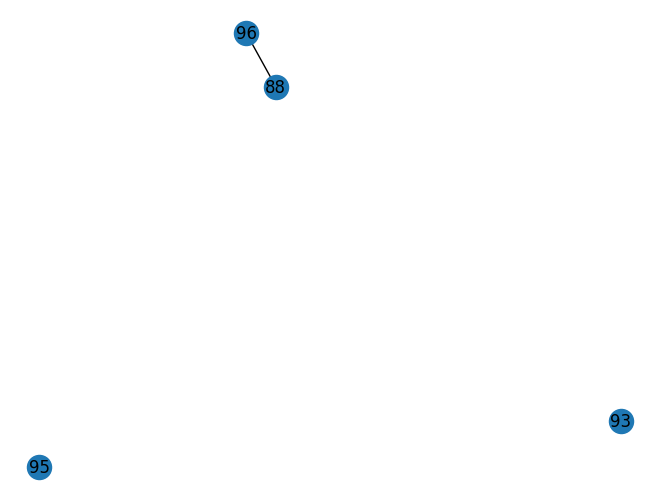

for upstream node 96, winning_node = 88, error_branches = [93 95]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (97.55504075401218) less than width_min(250)
Current node skip distance was 1670.9891004574602 but max skip distance was 1987.0475794936974
Current node skip distance was 1529.5449883497408 but max skip distance was 1529.5449883497408
Current node skip distance was 1714.031247526074 but max skip distance was 1714.031247526074
Current node skip distance was 1987.0475794936974 but max skip distance was 1987.0475794936974
Current node skip distance was 1580.3323147265337 but max skip distance was 1793.1204510958955
Current node skip distance was 1474.7194784132298 but max skip distance was 1506.4892019700978
Current node skip distance was 1517.7243823465901 but max skip distance was 1517.7243823465901
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1545.3348407623653 but max skip distance was 1545.334

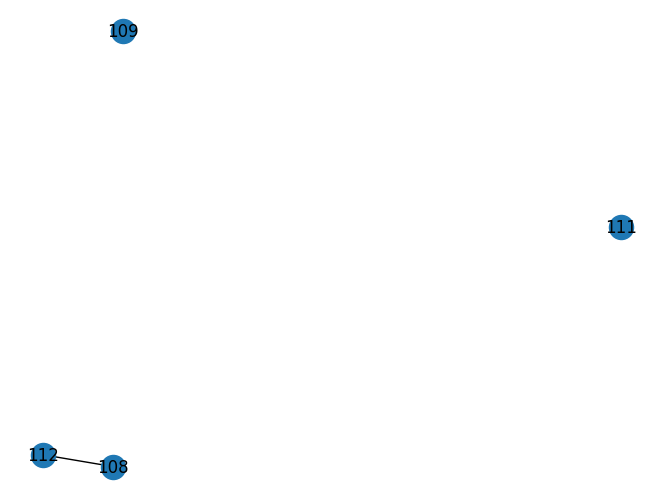

Performing global features query
Done with edge_df: 0.0009019374847412109
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  112  108     41.37   42.203666               0.413685   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000124                1                       False   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  112  108     41.37   42.203666               0.413685   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000124                1                       False   

  definite_partner_width_delete  
0                          None  


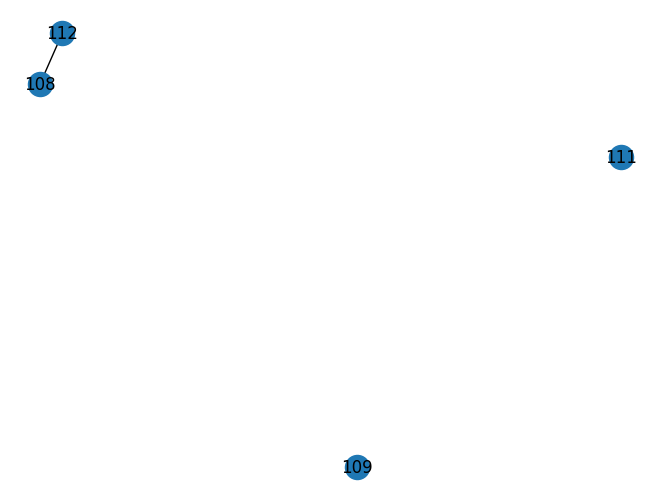

Performing node features query
Done with edge_df: 0.0025718212127685547
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  112  108     41.37   42.203666               0.413685   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000124                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  112  108     41.37   42.203666               0.413685   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000124                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


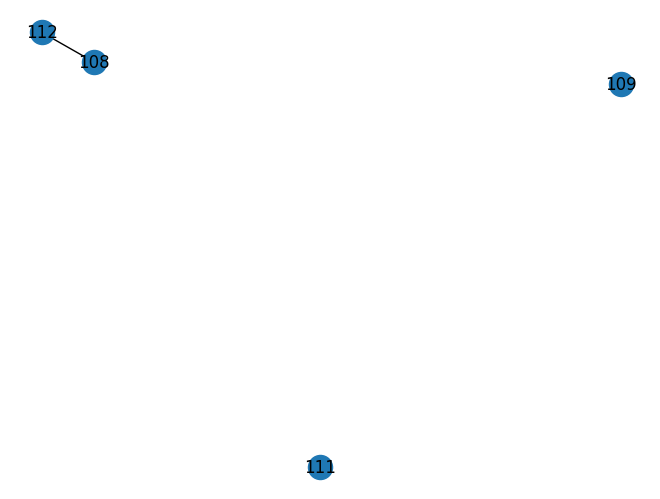

for upstream node 108, winning_node = 112, error_branches = [109 111]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (59.81510376025246) less than width_min(250)
Current node skip distance was 1558.5661985162365 but max skip distance was 1558.5661985162365
Current node skip distance was 1781.239046371689 but max skip distance was 1781.239046371689
Current node skip distance was 1463.7042418842564 but max skip distance was 1463.7042418842564
Current node skip distance was 1415.8962656677181 but max skip distance was 1415.8962656677181
Current node skip distance was 1504.0873190870434 but max skip distance was 1504.0873190870434
Current node skip distance was 1751.064151862433 but max skip distance was 1751.064151862433
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0009741783142089844
Performing Edge Query
After edge filter, # of 

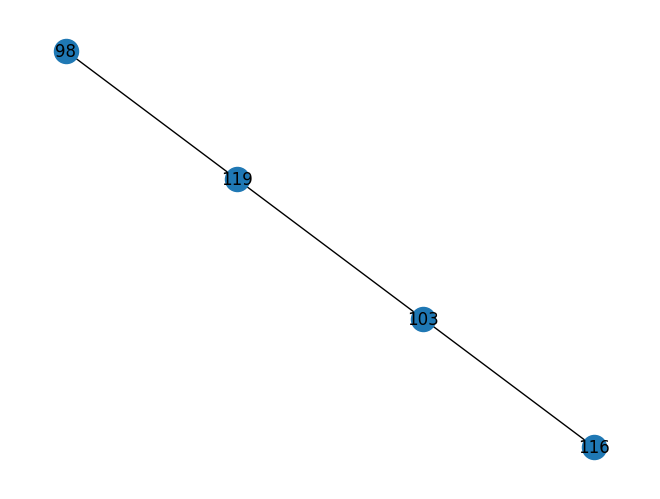

Performing global features query
Done with edge_df: 0.002240896224975586
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0   98  119     51.47   10.531367               0.120924   
1  103  119     40.55   22.720325               0.228852   
2  103  116     41.01   40.975641               0.292150   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000075                1                       None   
1              0.000109                2                       None   
2              0.000000                0                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0   98  119     51.47   10.531367               0.120924   


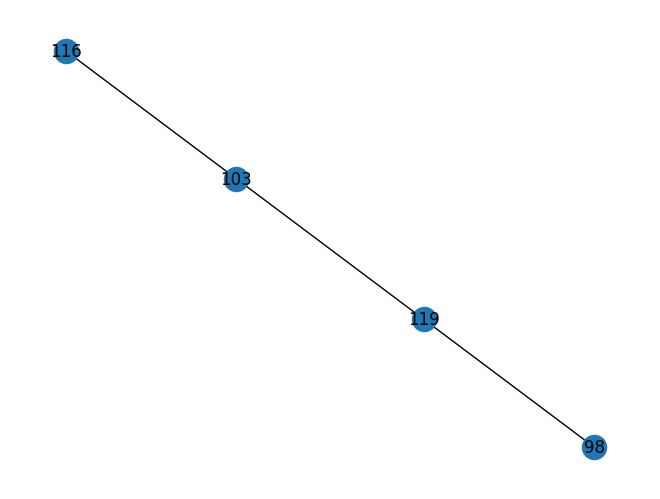

Performing node features query
Done with edge_df: 0.0010728836059570312
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0   98  119     51.47   10.531367               0.120924   
1  103  119     40.55   22.720325               0.228852   
2  103  116     41.01   40.975641               0.292150   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000075                1                       None   
1              0.000109                2                       None   
2              0.000000                0                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   True  
1                          None                   None  
2                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff

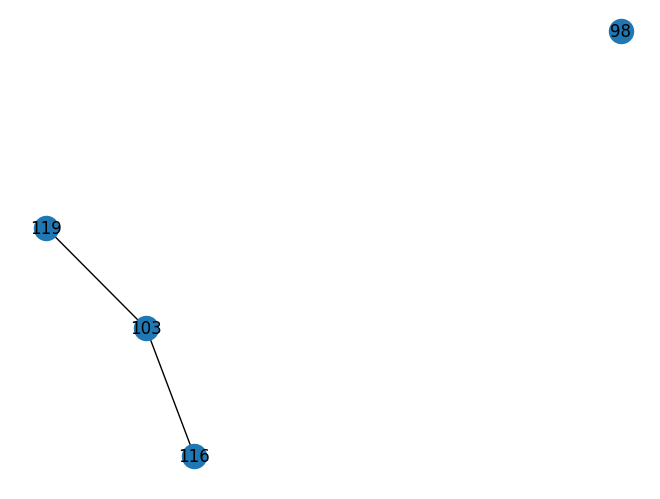

for upstream node 116, winning_node = None, error_branches = [ 98 103 119]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1674.3941981158493 but max skip distance was 2203.326717043745
Current node skip distance was 1687.0412595515836 but max skip distance was 2159.21297213352
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0009617805480957031
Performing Edge Query
After edge filter, # of rows = 5
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  120     94.45    9.087282               0.089075   
1  108  122     75.40   39.451274               0.386706   
2  108  118     56.28   22.871132               0.183130   
3  120  122    159.93   30.363992               0.326735   
4  120  118    140.15   3

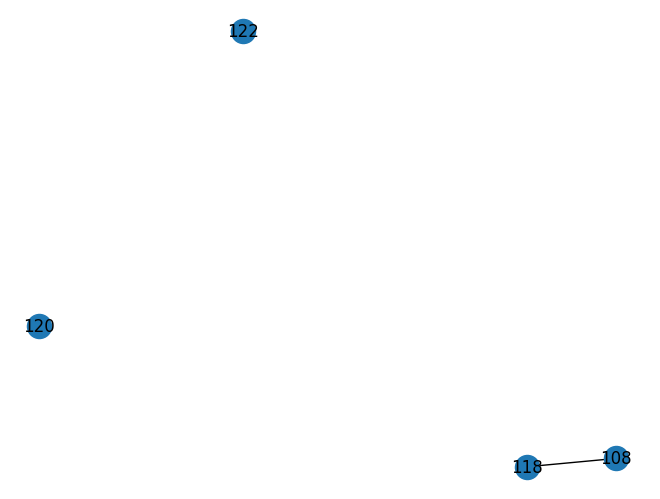

Performing global features query
Done with edge_df: 0.001354217529296875
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  118     56.28   22.871132                0.18313   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000124                1                       None   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  118     56.28   22.871132                0.18313   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000124                1                       None   

  definite_partner_width_delete  
0                          None  


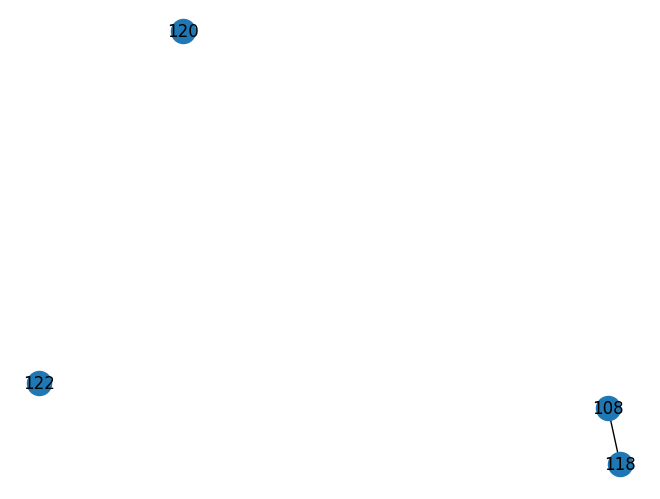

Performing node features query
Done with edge_df: 0.0011751651763916016
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  118     56.28   22.871132                0.18313   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000124                1                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  118     56.28   22.871132                0.18313   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000124                1                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


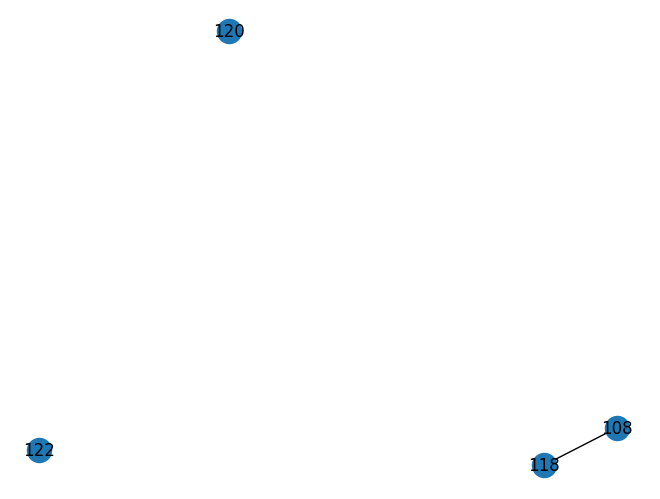

for upstream node 118, winning_node = 108, error_branches = [120 122]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (114.57200624065166) less than width_min(250)
Current node skip distance was 1485.6642933551425 but max skip distance was 1558.868122651933
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0009377002716064453
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   19.842334               0.210801   
1  149  152     73.40   17.199650               0.182726   
2  149  119     96.83   17.568919               0.229481   
3  151  152    115.64    2.642684               0.035574   
4  151  119     68.71    2.273415               0.029695   
5  152  119     12.83    0.369269

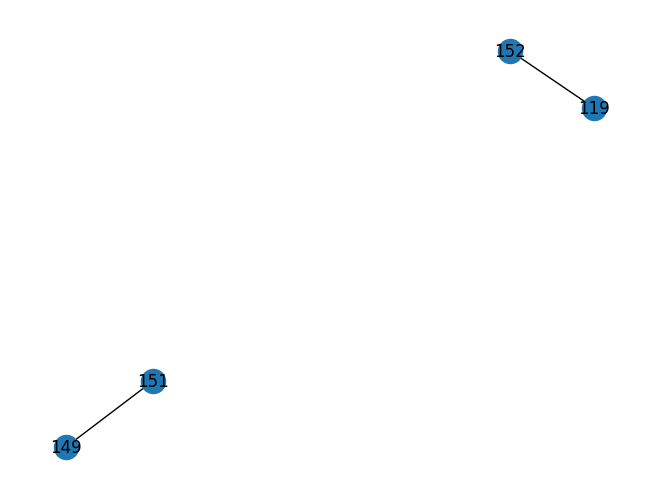

Performing global features query
Done with edge_df: 0.0009443759918212891
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   19.842334               0.210801   
1  152  119     12.83    0.369269               0.004823   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000000                0                       False   
1              0.000016                2                       False   

  definite_partner_width_delete  
0                          None  
1                         False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   19.842334               0.210801   
1  152  119     12.83    0.369269               0.004823   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000000     

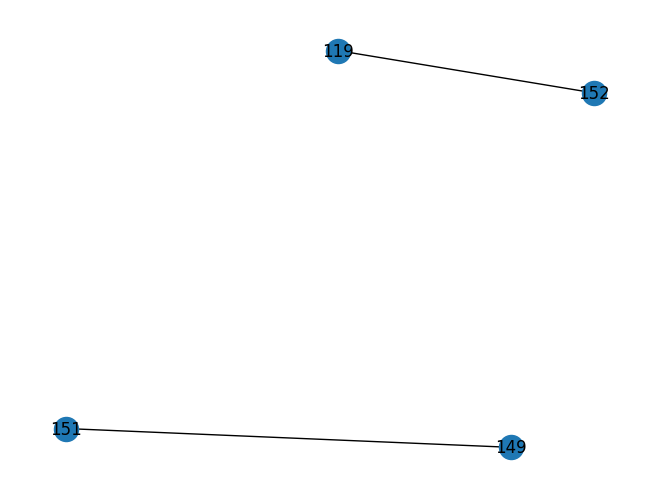

Performing node features query
Done with edge_df: 0.0010454654693603516
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   19.842334               0.210801   
1  152  119     12.83    0.369269               0.004823   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000000                0                       False   
1              0.000016                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                         False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   19.842334               0.210801   
1  152  119     12.83    0.369269               0.004823   

   synapse_density_diff  n_synapses_d

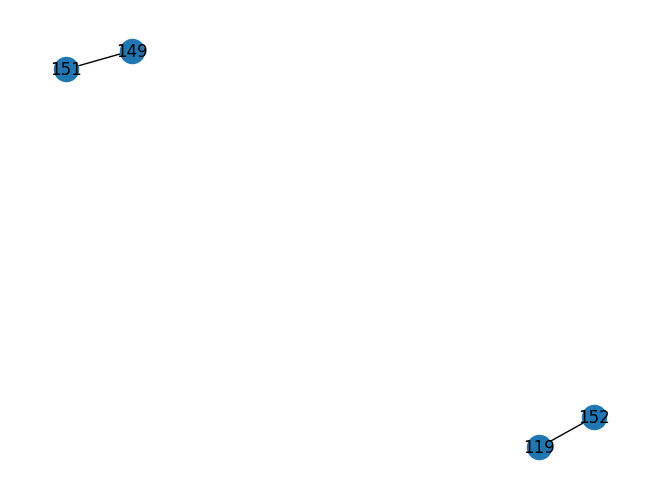

for upstream node 119, winning_node = 152, error_branches = [149 151]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (85.64442766699503) less than width_min(250)
Current node skip distance was 1553.8811988329603 but max skip distance was 1674.3941981158493
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0009622573852539062
Performing Edge Query
After edge filter, # of rows = 3
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  117  134     50.97   19.489267               0.204273   
1  117  135     26.31   23.130485               0.242437   
2  117  120    129.50    2.476545               0.026649   
3  134  135    107.21    3.641218               0.047962   
4  134  120     66.14   17.012722               0.183067   
5  135  120     38.50   20.653940

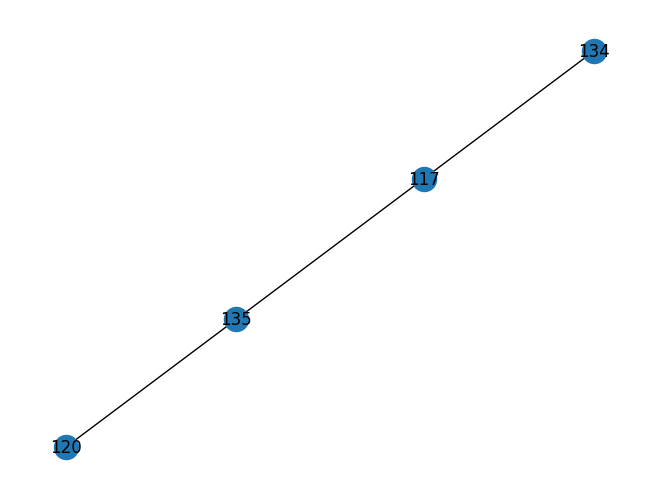

Performing global features query
Done with edge_df: 0.0009326934814453125
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  117  134     50.97   19.489267               0.204273   
1  117  135     26.31   23.130485               0.242437   
2  135  120     38.50   20.653940               0.222249   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000119                1                       None   
1              0.000032                0                       None   
2              0.000086                1                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  117  134     50.97   19.489267               0.204273   

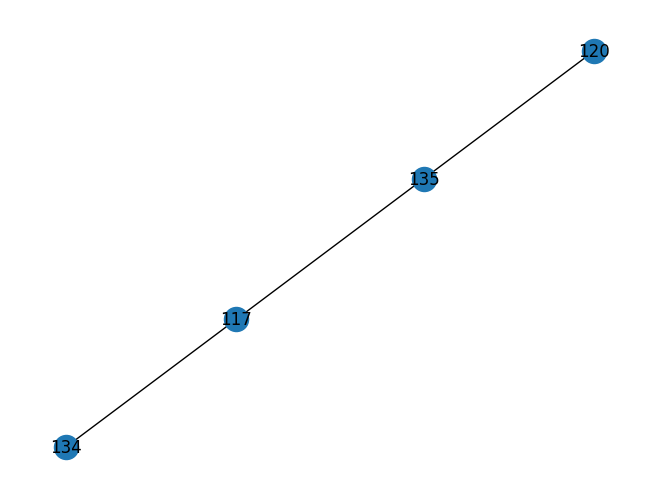

Performing node features query
Done with edge_df: 0.0009608268737792969
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  117  134     50.97   19.489267               0.204273   
1  117  135     26.31   23.130485               0.242437   
2  135  120     38.50   20.653940               0.222249   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000119                1                       None   
1              0.000032                0                       None   
2              0.000086                1                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   True  
1                          None                   None  
2                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff

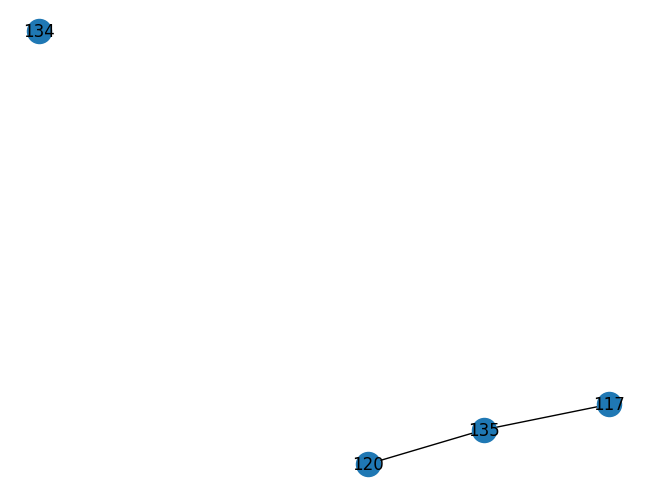

for upstream node 120, winning_node = None, error_branches = [117 134 135]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 2217.417300062152 but max skip distance was 2217.417300062152
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.002653837203979492
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  123     76.31    6.703663               0.045449   
1  110  124     29.09   86.029616               0.583262   
2  110  121     82.29  145.430472               0.496472   
3  123  124     83.10   79.325954               0.563420   
4  123  121     26.58  152.134135               0.519357   
5  124  121    122.22  231.460089               0.790161   


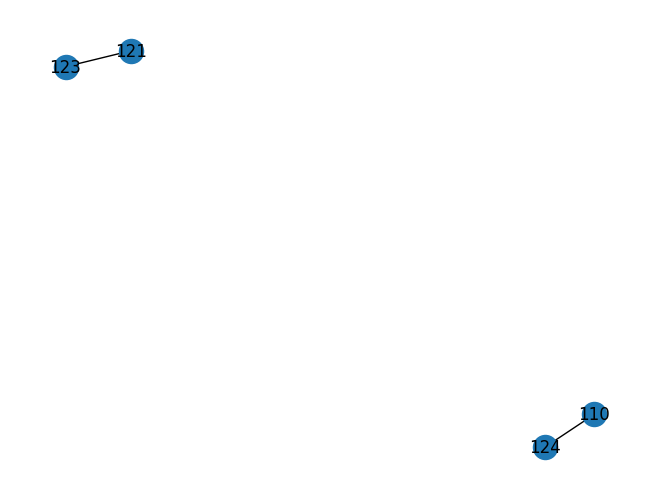

Performing global features query
Done with edge_df: 0.0010395050048828125
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  124     29.09   86.029616               0.583262   
1  123  121     26.58  152.134135               0.519357   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000107                1                       False   
1              0.000000                0                       False   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  124     29.09   86.029616               0.583262   
1  123  121     26.58  152.134135               0.519357   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000107     

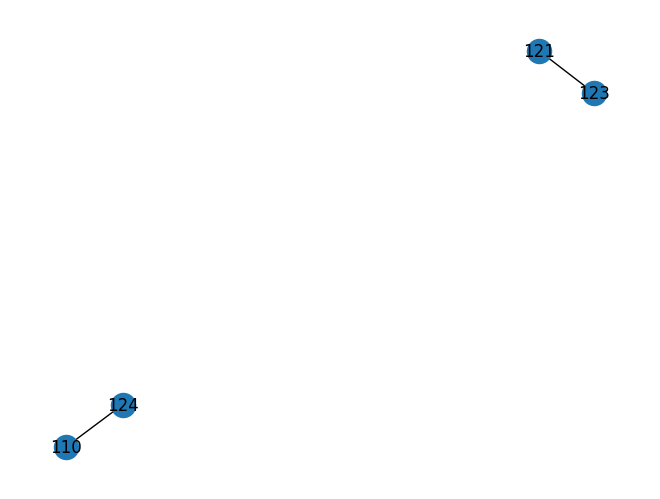

Performing node features query
Done with edge_df: 0.0009632110595703125
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  124     29.09   86.029616               0.583262   
1  123  121     26.58  152.134135               0.519357   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000107                1                       False   
1              0.000000                0                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  124     29.09   86.029616               0.583262   
1  123  121     26.58  152.134135               0.519357   

   synapse_density_diff  n_synapses_d

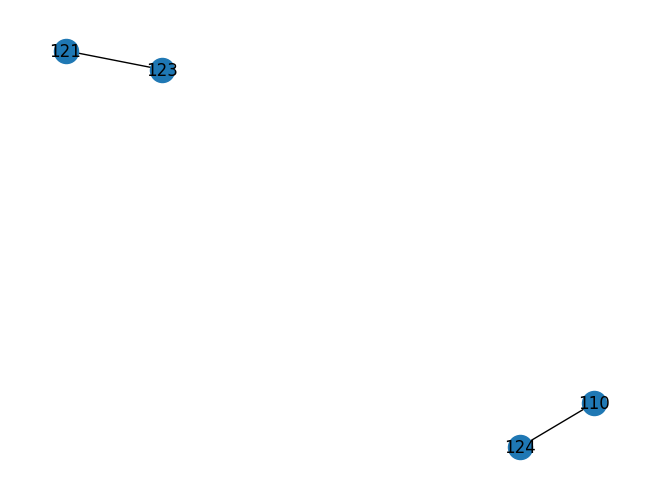

for upstream node 121, winning_node = 123, error_branches = [110 124]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (140.7937084839041) less than width_min(250)
Current node skip distance was 1427.364565567501 but max skip distance was 1427.364565567501
Current node skip distance was 1753.307118682933 but max skip distance was 2098.010254315903
Current node skip distance was 1422.7823118140598 but max skip distance was 1422.7823118140598
Current node skip distance was 1458.0752703648905 but max skip distance was 1458.0752703648905
Current node skip distance was 2098.010254315903 but max skip distance was 2098.010254315903
Current node skip distance was 1556.065657251308 but max skip distance was 1556.065657251308
Current node skip distance was 1550.1241718840056 but max skip distance was 2142.1063878645527
Current node skip distance was 1903.260530500792 but max skip distance was 2300.0
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.

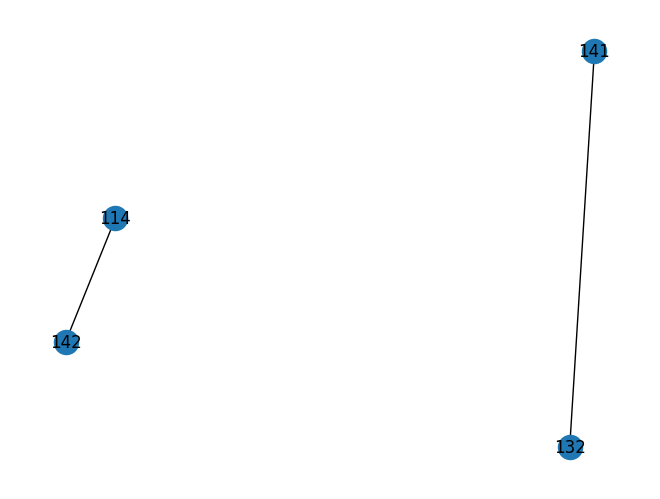

Performing global features query
Done with edge_df: 0.0010409355163574219
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   
1  141  132      6.99   68.881320               0.389639   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   
1                   0.0                0                       False   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   
1  141  132      6.99   68.881320               0.389639   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0     

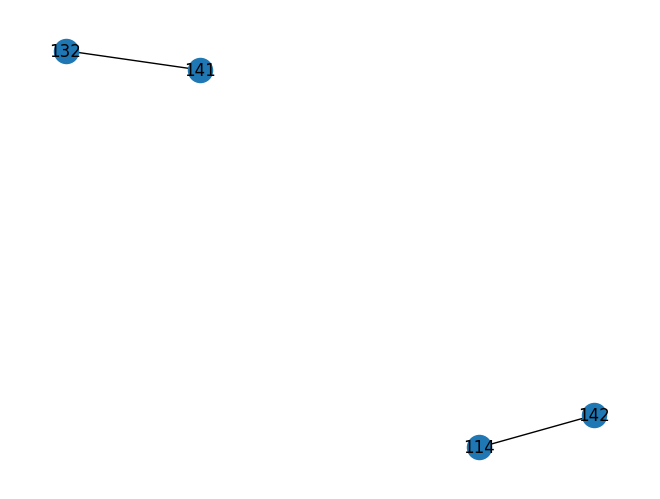

Performing node features query
Done with edge_df: 0.0012574195861816406
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   
1  141  132      6.99   68.881320               0.389639   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   
1                   0.0                0                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   
1  141  132      6.99   68.881320               0.389639   

   synapse_density_diff  n_synapses_d

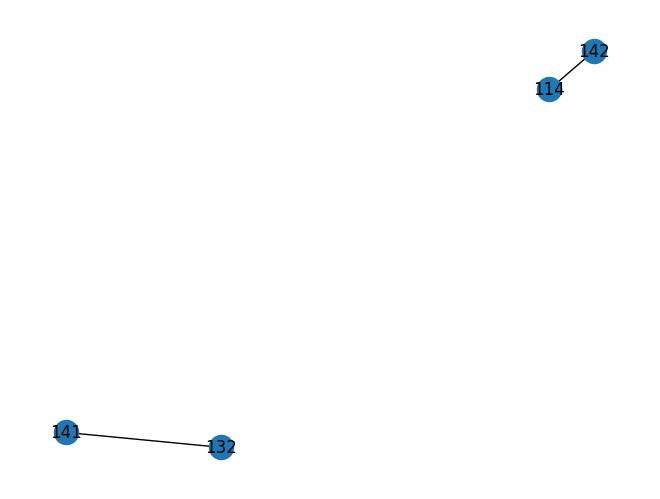

for upstream node 132, winning_node = 141, error_branches = [114 142]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (107.90120707738356) less than width_min(250)
Current node skip distance was 1851.9256195502198 but max skip distance was 1903.260530500792
Current node skip distance was 1482.9948556594454 but max skip distance was 1482.9948556594454
Current node skip distance was 1467.8231152466783 but max skip distance was 1467.8231152466783
Current node skip distance was 1976.5180519314986 but max skip distance was 1976.5180519314986
Current node skip distance was 1438.6446821350578 but max skip distance was 1438.6446821350578
Current node skip distance was 2300 but max skip distance was 2300.0
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0009489059448242188
Performing Edge Query
After edge filter, # of rows = 4
Exporting the

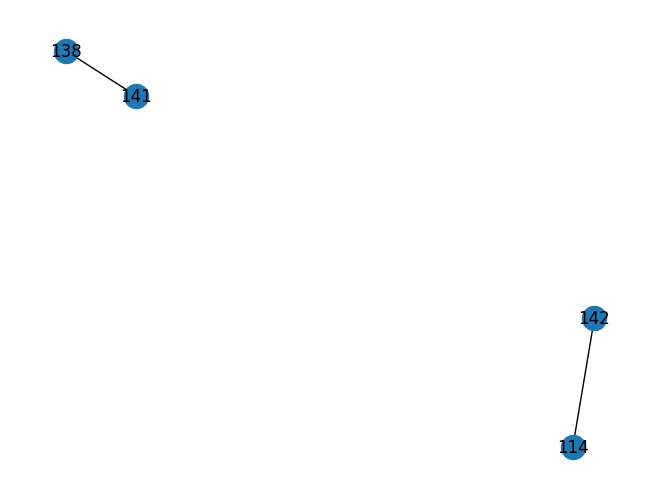

Performing global features query
Done with edge_df: 0.0009260177612304688
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   
1  141  138      8.36  110.161866               0.505183   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   
1                   0.0                0                       False   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   
1  141  138      8.36  110.161866               0.505183   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0     

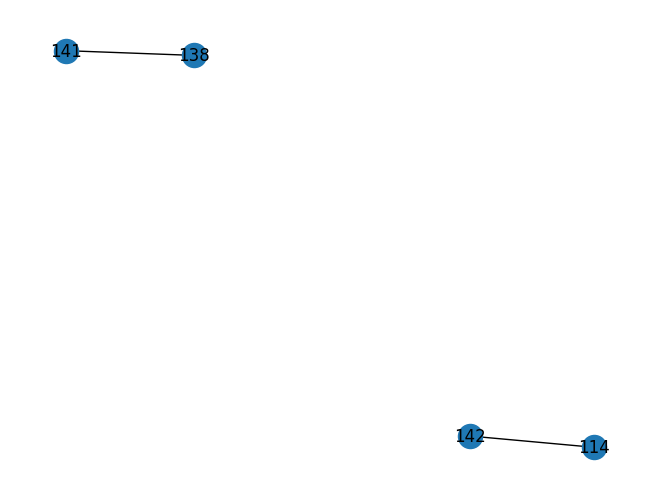

Performing node features query
Done with edge_df: 0.001188039779663086
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   
1  141  138      8.36  110.161866               0.505183   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   
1                   0.0                0                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   
1  141  138      8.36  110.161866               0.505183   

   synapse_density_diff  n_synapses_di

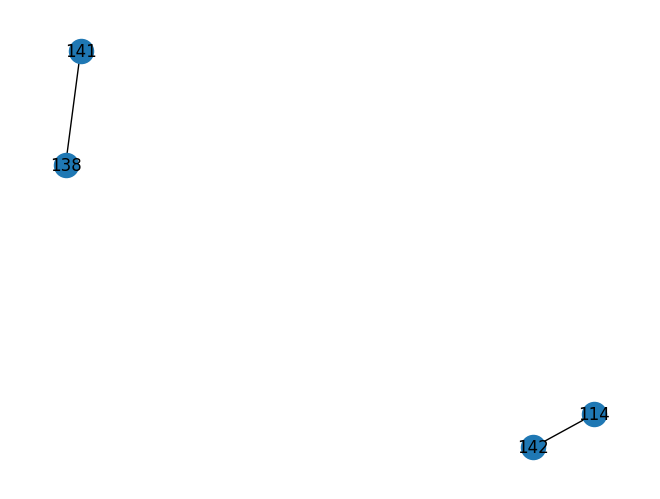

for upstream node 138, winning_node = 141, error_branches = [114 142]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (107.90120707738356) less than width_min(250)
Current node skip distance was 1616.2550294890975 but max skip distance was 1616.2550294890975
Current node skip distance was 1388.4752639608032 but max skip distance was 1388.4752639608032
Current node skip distance was 1806.3391071128144 but max skip distance was 1851.9256195502198
Current node skip distance was 1506.4892019700978 but max skip distance was 1506.4892019700978
Current node skip distance was 1829.4403823438415 but max skip distance was 1829.4403823438415
Current node skip distance was 1421.724095731764 but max skip distance was 1587.281058495119
Current node skip distance was 1558.868122651933 but max skip distance was 1558.868122651933
Current node skip distance was 1505.1034540094106 but max skip distance was 1505.1034540094106
Current node skip distance was 1476.1917328180928 but m

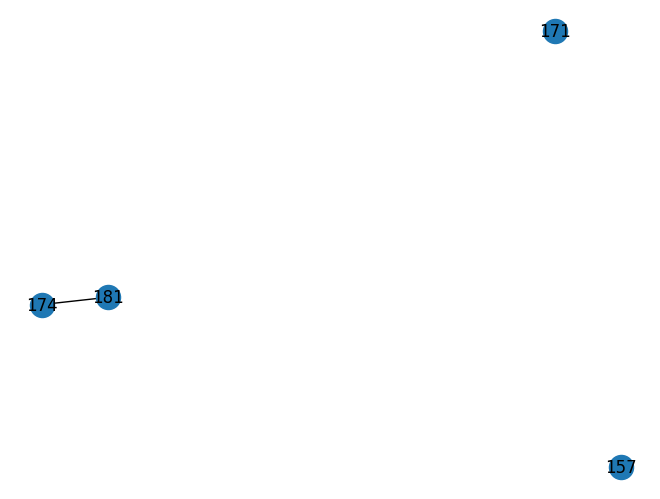

Performing global features query
Done with edge_df: 0.0008749961853027344
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  174  181      6.21    0.942918               0.004542   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   

   definite_partner_width_delete  
0                          False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  174  181      6.21    0.942918               0.004542   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   

   definite_partner_width_delete  
0                          False  


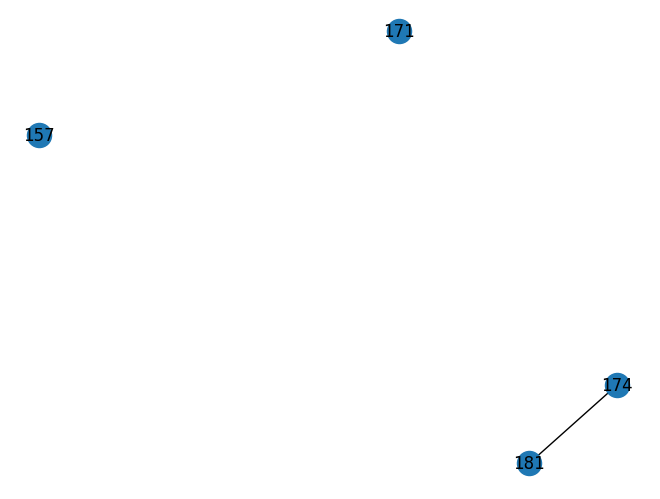

Performing node features query
Done with edge_df: 0.0009229183197021484
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  174  181      6.21    0.942918               0.004542   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  174  181      6.21    0.942918               0.004542   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  


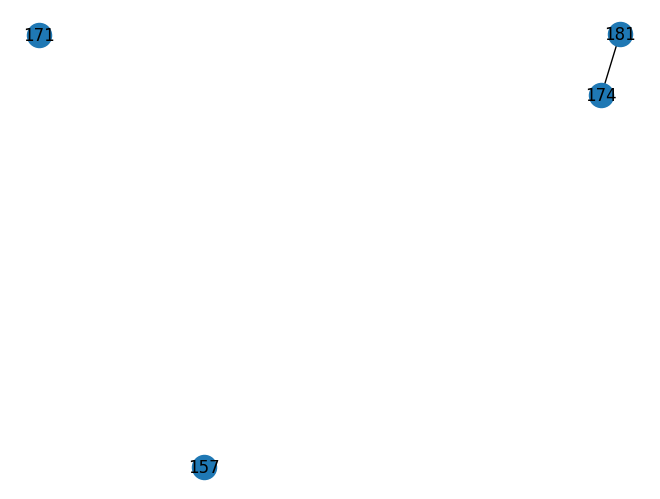

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1839.1475043627702 but max skip distance was 1839.1475043627702
Current node skip distance was 1521.6049711642097 but max skip distance was 1839.1475043627702
Current node skip distance was 1545.639811575495 but max skip distance was 1545.639811575495
Current node skip distance was 1695.4260963446525 but max skip distance was 1695.4260963446525
Current node skip distance was 1547.5571932935732 but max skip distance was 1695.4260963446525
Current node skip distance was 1763.1736207842287 but max skip distance was 1763.1736207842287
Current node skip distance was 1528.327643905881 but max skip distance was 1528.327643905881
Current node skip distance was 1493.188825278979 but max skip distance was 1763.1736207842287
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6

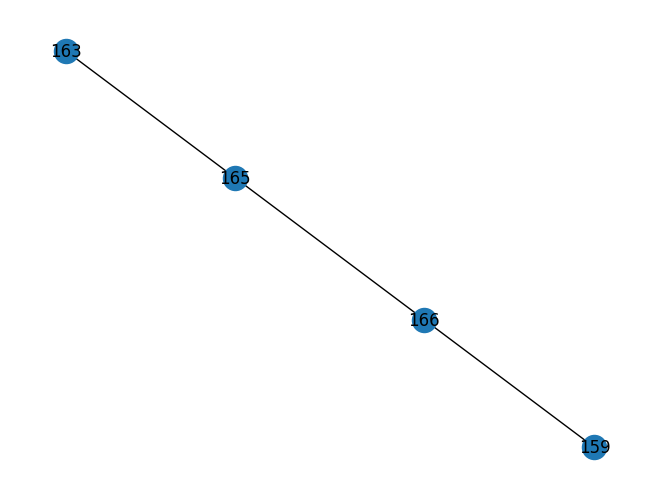

Performing global features query
Done with edge_df: 0.0009768009185791016
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  159  166     37.49   15.722047               0.184563   
1  163  165     43.05   64.796351               0.826850   
2  166  165     62.35    8.902172               0.113598   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029                1                       None   
1              0.000146                1                       None   
2              0.000117                0                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  159  166     37.49   15.722047               0.184563   

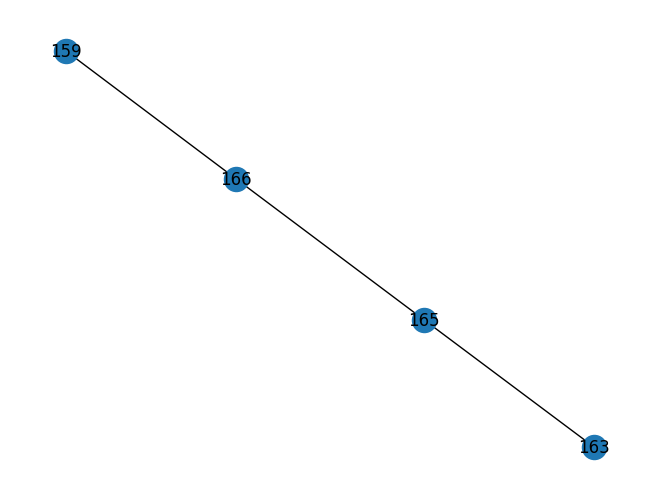

Performing node features query
Done with edge_df: 0.001344919204711914
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  159  166     37.49   15.722047               0.184563   
1  163  165     43.05   64.796351               0.826850   
2  166  165     62.35    8.902172               0.113598   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029                1                       None   
1              0.000146                1                       None   
2              0.000117                0                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
2                          None                   True  
Afer Node query: 
     u    v  sk_angle  width_diff 

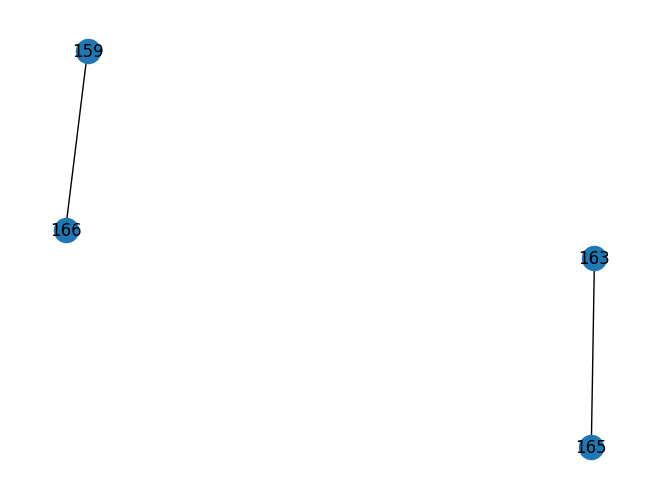

for upstream node 165, winning_node = 163, error_branches = [159 166]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (143.16166898821504) less than width_min(250)
Current node skip distance was 1456.096439990625 but max skip distance was 1456.096439990625
Current node skip distance was 1438.7677292204708 but max skip distance was 1438.7677292204708
Current node skip distance was 1477.7008019468528 but max skip distance was 1823.5915015780708
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0009980201721191406
Performing Edge Query
After edge filter, # of rows = 5
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  165    150.60   12.588237               0.138403   
1  160  175      5.52   66.708406               0.733434   
2  160  168    145.72   

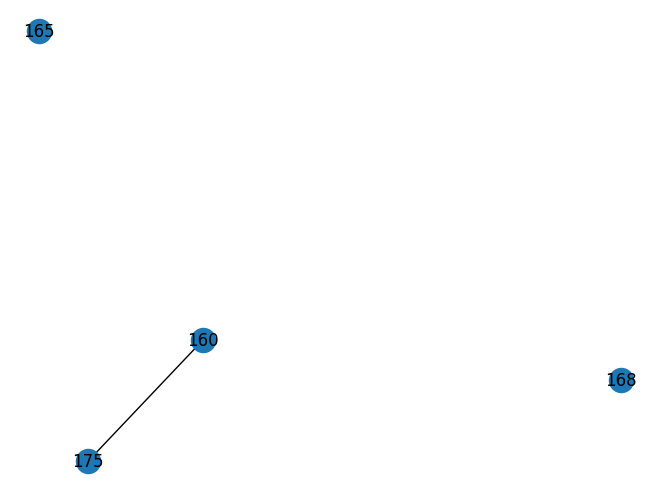

Performing global features query
Done with edge_df: 0.0021393299102783203
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  175      5.52   66.708406               0.733434   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000058                1                       False   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  175      5.52   66.708406               0.733434   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000058                1                       False   

  definite_partner_width_delete  
0                          None  


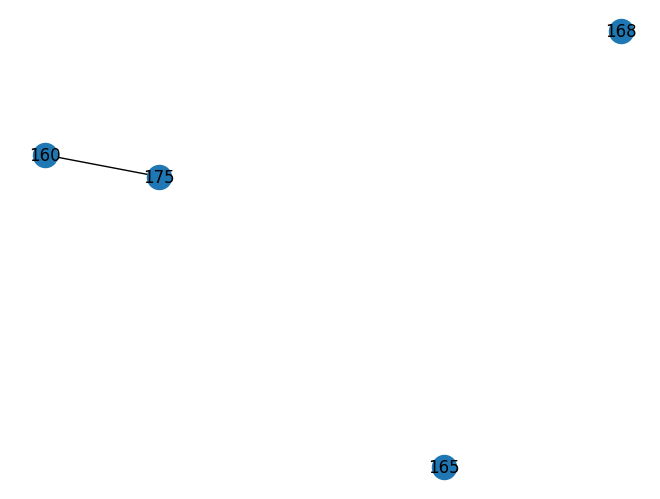

Performing node features query
Done with edge_df: 0.0009095668792724609
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  175      5.52   66.708406               0.733434   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000058                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  175      5.52   66.708406               0.733434   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000058                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


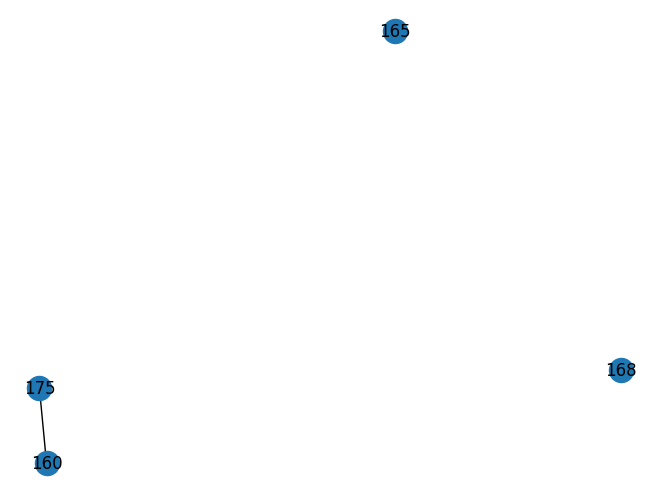

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1499.8793134527978 but max skip distance was 1499.8793134527978
Current node skip distance was 1620.256694044604 but max skip distance was 1620.256694044604
Current node skip distance was 1421.271140850338 but max skip distance was 1545.639811575495
Current node skip distance was 2031.6334345541873 but max skip distance was 2300.0
Current node skip distance was 1823.5915015780708 but max skip distance was 1823.5915015780708
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0010585784912109375
Performing Edge Query
After edge filter, # of rows = 6
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  180      6.40    5.328512               0.092817   
1  176  

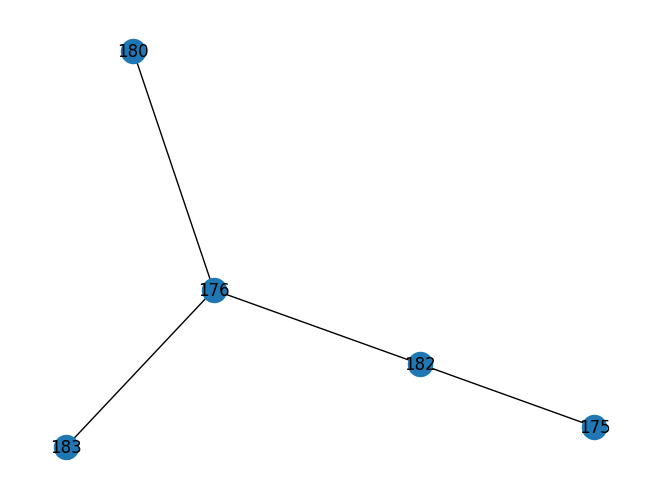

Performing global features query
Done with edge_df: 0.0009908676147460938
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  180      6.40    5.328512               0.092817   
1  176  182     54.70   44.139437               0.768864   
2  176  183      8.95    4.869116               0.084815   
3  182  175     64.98   56.113901               0.355913   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000000                0                       None   
1              0.000243                1                       None   
2              0.000000                0                       None   
3              0.000243                1                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
3       

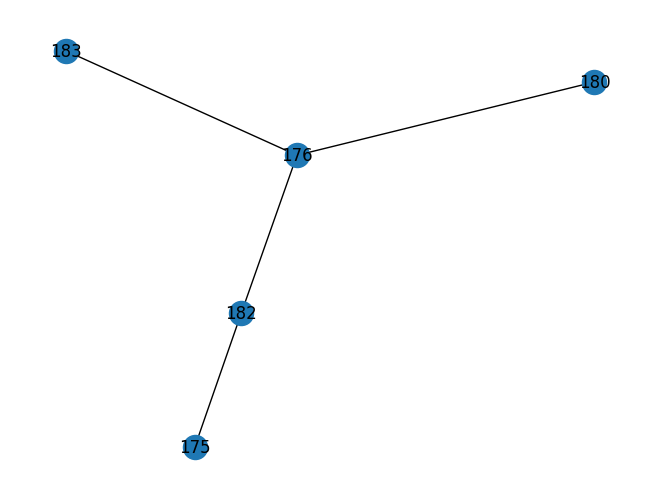

Performing node features query
Done with edge_df: 0.0010352134704589844
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  180      6.40    5.328512               0.092817   
1  176  182     54.70   44.139437               0.768864   
2  176  183      8.95    4.869116               0.084815   
3  182  175     64.98   56.113901               0.355913   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000000                0                       None   
1              0.000243                1                       None   
2              0.000000                0                       None   
3              0.000243                1                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None   

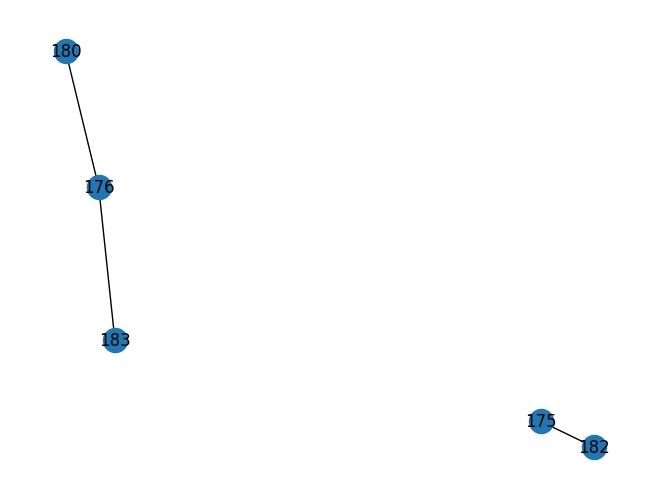

for upstream node 175, winning_node = 182, error_branches = [176 180 183]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1405.8692599063913 but max skip distance was 1405.8692599063913
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1674.0366465450427 but max skip distance was 1674.0366465450427
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0009605884552001953
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  182     54.70   44.139437               0.768864   
1  176  183      8.95    4.869116               0.084815   
2  176  179    165.29   64.360173               0.528544   


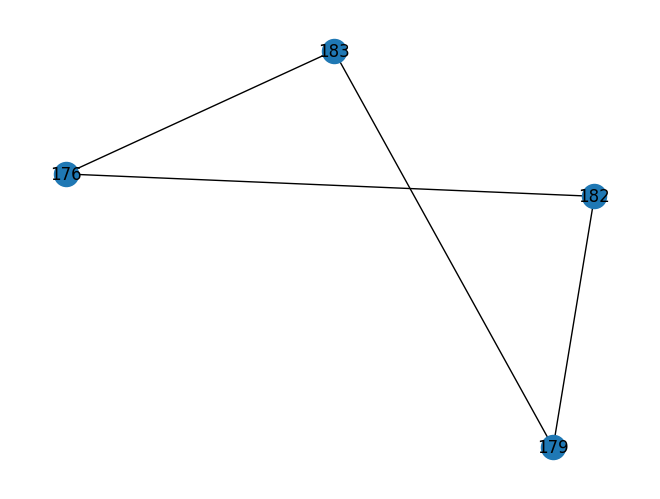

Performing global features query
Done with edge_df: 0.0009989738464355469
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  182     54.70   44.139437               0.768864   
1  176  183      8.95    4.869116               0.084815   
2  182  179     57.59   20.220736               0.166058   
3  183  179     22.87   69.229288               0.568531   

   synapse_density_diff  n_synapses_diff definite_partner_width_delete  \
0              0.000243                1                          True   
1              0.000000                0                         False   
2              0.000243                1                          None   
3              0.000000                0                          True   

  definite_partner_sk_delete  
0                       None  
1                       None  
2                       None  
3    

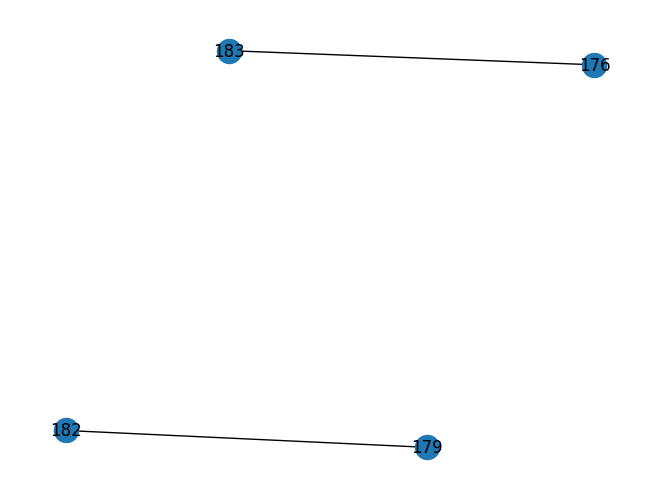

Performing node features query
Done with edge_df: 0.0013852119445800781
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  183      8.95    4.869116               0.084815   
1  182  179     57.59   20.220736               0.166058   

   synapse_density_diff  n_synapses_diff definite_partner_width_delete  \
0              0.000000                0                         False   
1              0.000243                1                          None   

  definite_partner_sk_delete above_threshold_delete  
0                       None                   None  
1                       None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  183      8.95    4.869116               0.084815   
1  182  179     57.59   20.220736               0.166058   

   synapse_density_diff  n_synapses_diff

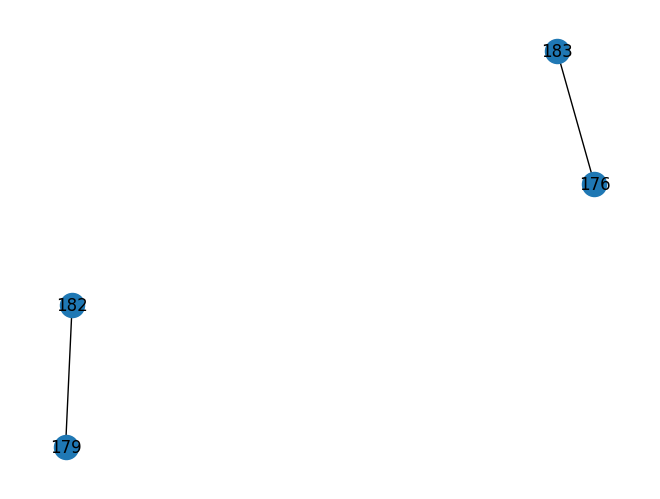

for upstream node 179, winning_node = 182, error_branches = [176 183]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (101.54805929174576) less than width_min(250)
Current node skip distance was 1428.0713915564047 but max skip distance was 1428.0713915564047
Current node skip distance was 2123.0092484774095 but max skip distance was 2300.0
Current node skip distance was 1589.7835803822734 but max skip distance was 1589.7835803822734
Current node skip distance was 1385.5812786224683 but max skip distance was 1385.5812786224683
Current node skip distance was 2097.9950585773577 but max skip distance was 2097.9950585773577
Current node skip distance was 1907.1869472675644 but max skip distance was 1907.1869472675644
limb_branch_dict_to_cancel = {'L3': array([105, 115, 102, 104, 145, 178, 147, 177, 150, 153, 156, 157, 152,
       173, 168, 167, 179, 182, 163, 184, 185, 187, 189, 186, 188, 154,
       155,  31,  35,  37,  45,  46,  54,  57,  58,  61,  62,  64,  65,
 

In [44]:
neuron_obj_proof = npu.auto_proof_stage(
    neuron_obj_axon,
    mesh_decimated = mesh_decimated,
    calculate_after_proof_stats = False,
)

In [45]:
_ = npu.after_auto_proof_stats(
    neuron_obj_proof,
    store_in_obj = True,
)


Working on compartment basal---
Compartment limb stats = {'n_limbs': 4, 'soma_angle_max': 126.03, 'soma_angle_min': 90.34}

Working on compartment apical_total---
Compartment limb stats = {'n_limbs': 1, 'soma_angle_max': 32.18, 'soma_angle_min': 32.18}

Working on compartment axon---
Compartment limb stats = {'n_limbs': 1, 'soma_angle_max': 156.14, 'soma_angle_min': 156.14}

Working on compartment dendrite---
Compartment limb stats = {'n_limbs': 5, 'soma_angle_max': 126.03, 'soma_angle_min': 32.18}


# Saving off the autoproofread neuron

In [46]:
vdi.save_neuron_obj_auto_proof(
    neuron_obj_proof,
)

Total time for soma meshes compression = 0.5495142936706543
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 0.3931846618652344
Total time for limb_meshes compression = 1.8868324756622314
    Starting Limb Correspondence Compression
Total time for new_limb_correspondence compression = 9.801130056381226
Cleared mesh: <trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>:140127952317792
Cleared mesh: <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>:140128775124448
Cleared mesh: <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>:140128811065840
Cleared mesh: <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>:140128811066704
Cleared mesh: <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>:140127949891088
Cleared mesh: <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>:140127949892432
Cleared mesh: <trimesh.Trimesh(vertices

'864691134917511946_auto_proof.pbz2'

# Plotting the final neuron

In [47]:
from neurd import synapse_utils as syu

In [48]:
from datasci_tools import ipyvolume_utils as ipvu
ipvu.plot_objects(
    neuron_obj_axon.mesh,
    meshes = [neuron_obj_proof.mesh],
    meshes_colors="red"
)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [49]:
syu.plot_synapses(neuron_obj_proof)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [50]:
syu.plot_synapses_error_from_neuron_obj(neuron_obj_proof)    

# of error synapses = 199

 Working on visualization type: mesh


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [51]:
syu.plot_synapses_valid_from_neuron_obj(neuron_obj_proof)  

# of valid synapses = 2116

 Working on visualization type: mesh


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [52]:
nviz.plot_compartments(neuron_obj_proof)


 Working on visualization type: mesh


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

apical:blue
apical_shaft:aqua
apical_tuft:purple
basal:yellow
axon:red
oblique:green


Unlabeled: transparent green


In [53]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
